In [1]:
library(mgcv)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.


In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_clean.csv', DATA))
head(data)

lon       lat      etopo1   beetleAcres host forest mStdAge   density 
1 -123.9778 41.15724 462.4003  0.46000    1    1       24.51245 51675.95
2 -123.6292 39.83341 636.2545  0.70000    1    1       78.60288 47511.05
3 -123.7100 41.00384 758.2146  0.92000    1    1       56.26146 51141.66
4 -123.7726 41.36003 924.6661 15.23333    1    1      189.66301 52250.75
5 -123.6073 41.10505 766.6403  0.70000    1    1       78.18508 50122.04
6 -123.6228 41.19412 729.4384  9.30000    1    1      109.59647 51100.97
  PctLarge  PctOld     ⋯ JanMin    TOctSep   Jan20 PcumOctSep logSprsCPA.p1
1 0.2191781 0.06666667 ⋯ -1.310873 10.921748 0     2914.449   8.112028     
2 0.3593750 0.50000000 ⋯ -2.068149 10.979370 0     2751.259   9.361249     
3 0.4605263 0.71428571 ⋯ -2.187790 11.975916 0     2702.836   8.456540     
4 0.3257576 0.20833333 ⋯ -3.029533  8.998663 0     2946.935   9.933758     
5 0.3162281 0.20000000 ⋯ -3.342976  8.919163 0     2822.343   8.805613     
6 0.3793103 0.11111111 ⋯ -2.963782 10.673803 0     2762.928   8.071219     
  SprsFires PctSprs   SprsAcre    SprsDays OutDays
1 7         0.8750000    8.257143  3.0      6.0   
2 1         1.0000000 3597.000000 34.0     72.0   
3 8         0.6666667    0.112500  0.0      0.5   
4 2         0.3333333    0.300000  1.0      0.5   
5 8         0.8000000  606.425000  0.5      1.0   
6 9         0.6923077   11.266667  1.0      4.0

In [3]:
for (field in names(data)) {
  if (field != 'beetleAcres') {
    cat(sprintf('te(%s) + ', field))   
  }
}

te(lon) + te(lat) + te(etopo1) + te(host) + te(forest) + te(mStdAge) + te(density) + te(PctLarge) + te(PctOld) + te(vcc) + te(mfri) + te(prs) + te(pms) + te(pls) + te(GAP1) + te(GAP2) + te(GAP3) + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + te(logSprsCPA.p1) + te(SprsFires) + te(PctSprs) + te(SprsAcre) + te(SprsDays) + te(OutDays) + 

For the model below-- Began with all variables included with te() smoothing for all except the binary variables 
(forest, host, GAP*)
For each iteration:
* Find the variable with the largest p value
* If the p value > 0.05 then:
    * If the value is smoothed, convert to simple linear term (no te())
    * If the value is a simple linear term, omit from the model
* Continue as long as the GCV value continues to decrease
* IF GCV increases, attempt simplification or removal of the variable with the next-largest p value

In [4]:
# GAM iteration
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + te(mStdAge) + 
    te(density) + te(PctLarge) + te(PctOld) + te(vcc) + te(mfri) + te(prs) + te(pms) + 
    te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + 
    te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + te(logSprsCPA.p1) + 
    te(SprsFires) + te(PctSprs) + te(SprsAcre) + te(SprsDays) + te(OutDays),
    data=data) # GCV = 2.3707
proc.time() - ptm

   user  system elapsed 
 23.635   0.513  26.117 

In [5]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + 
    te(mStdAge) + te(density) + te(PctLarge) + te(PctOld) + te(vcc) + 
    te(mfri) + te(prs) + te(pms) + te(pls) + GAP1 + GAP2 + GAP3 + 
    te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + te(Tmean) + 
    te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + 
    te(AugMaxT) + te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + 
    te(ddAugJul) + te(JanTmin) + te(PPT) + te(summerP2) + te(TMarAug) + 
    te(Mar20) + te(fallTmean) + te(MarTmin) + te(maxT) + te(Tmin) + 
    te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep) + 
    te(logSprsCPA.p1) + te(SprsFires) + te(PctSprs) + te(SprsAcre) + 
    te(SprsDays) + te(OutDays)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.74815    0.28456  13.172   <2e-16 ***
host         0.59280    0.

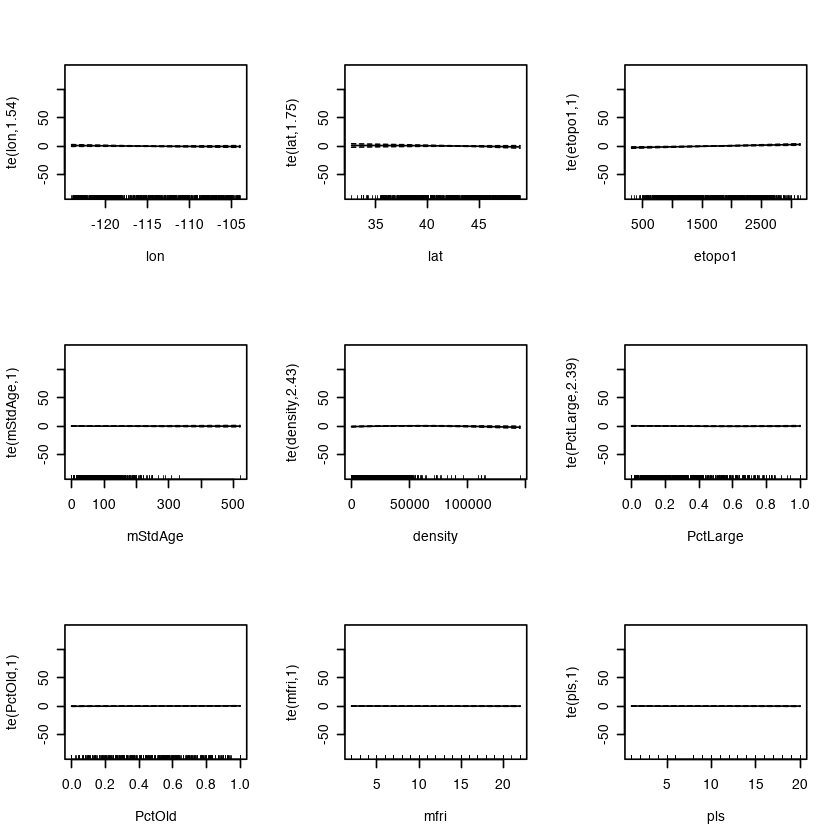

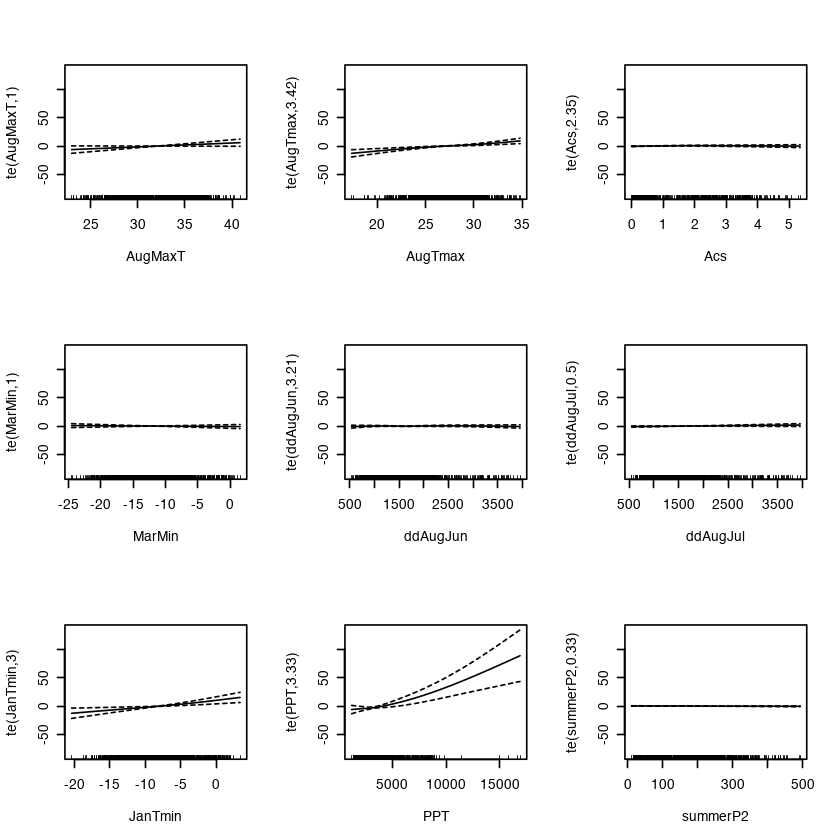

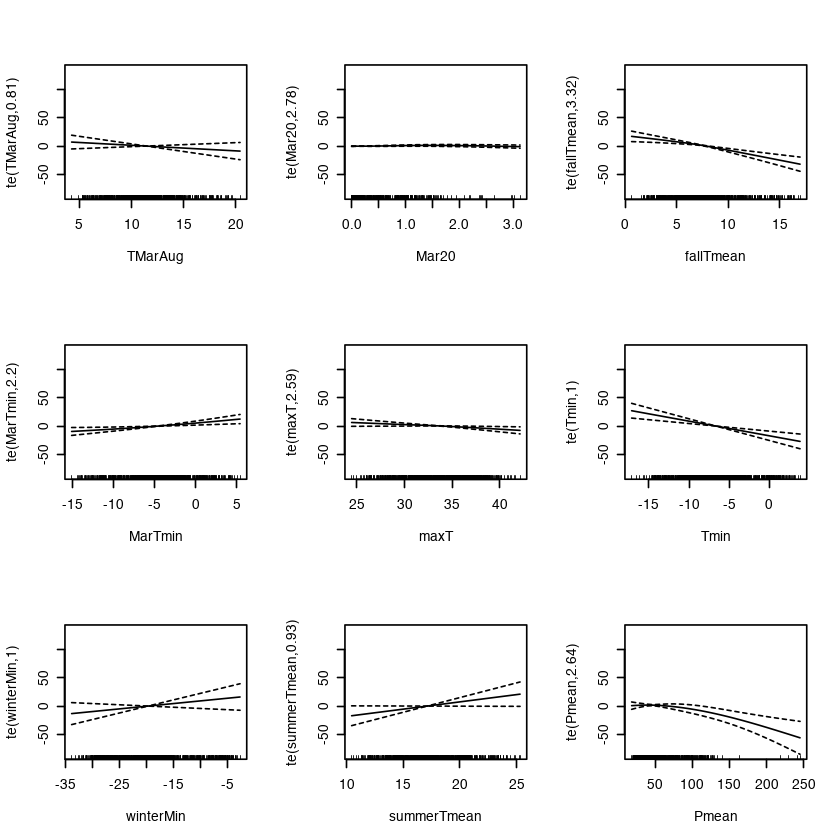

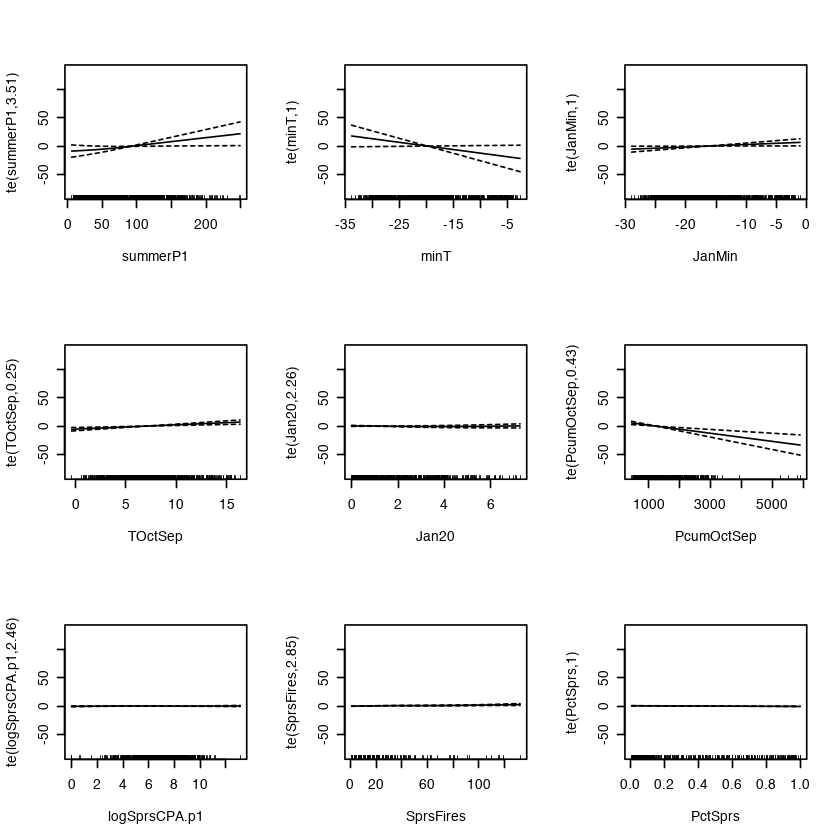

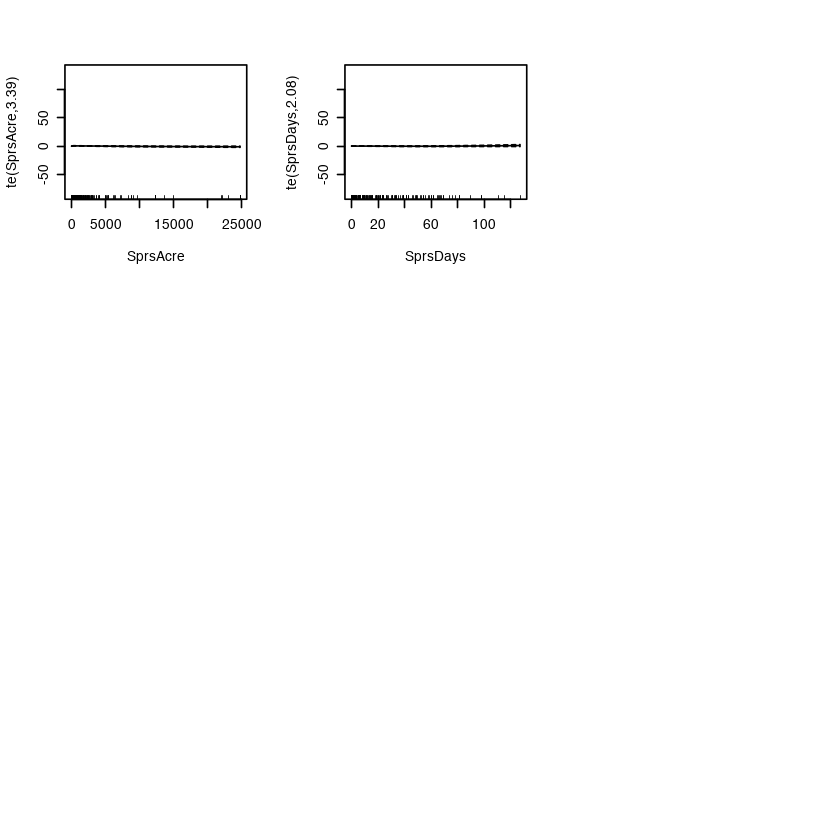

In [16]:
par(mfrow=c(3, 3))
plot(mod)

In [51]:
smoothed <- c(
  'lon', 'lat', 'etopo1', 'mStdAge', 'density', 'PctLarge', 'vcc', 'mfri',
  'prs', 'pms', 'pls', 'vpd', 'cwd', 'maxAugT', 'summerP0', 'Tmean', 'mi', 
  'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugMaxT', 'Acs', 'MarMin', 'ddAugJun', 
  'ddAugJul', 'JanTmin', 'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 
  'MarTmin', 'maxT', 'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'summerP1', 'minT', 
  'JanMin', 'TOctSep', 'Jan20', 'PcumOctSep', 'logSprsCPA.p1', 'SprsFires', 
  'PctSprs', 'SprsAcre', 'SprsDays', 'OutDays')

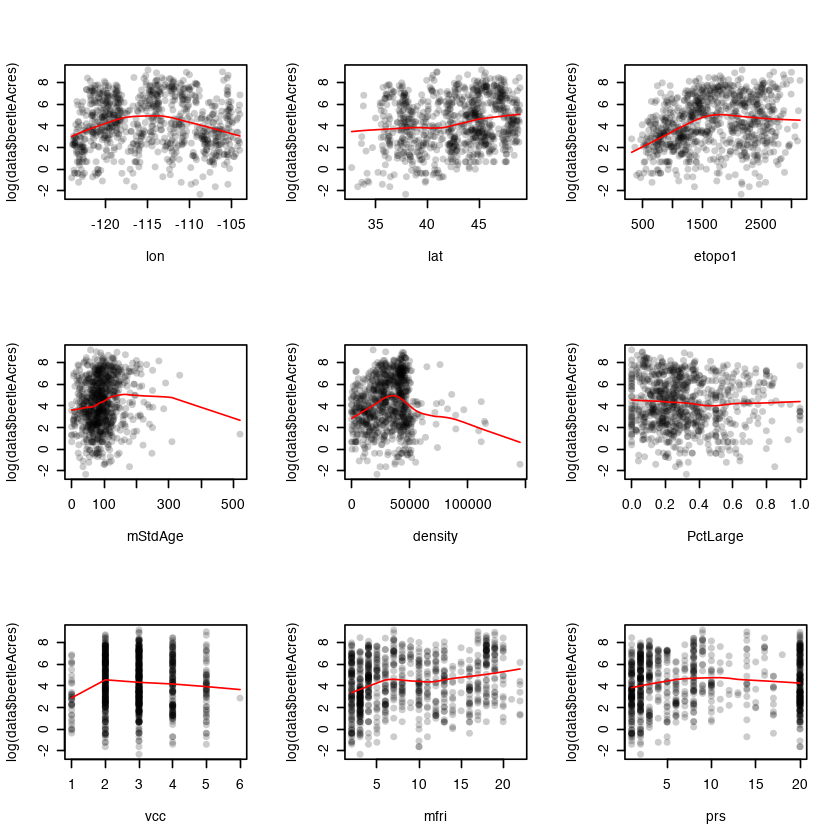

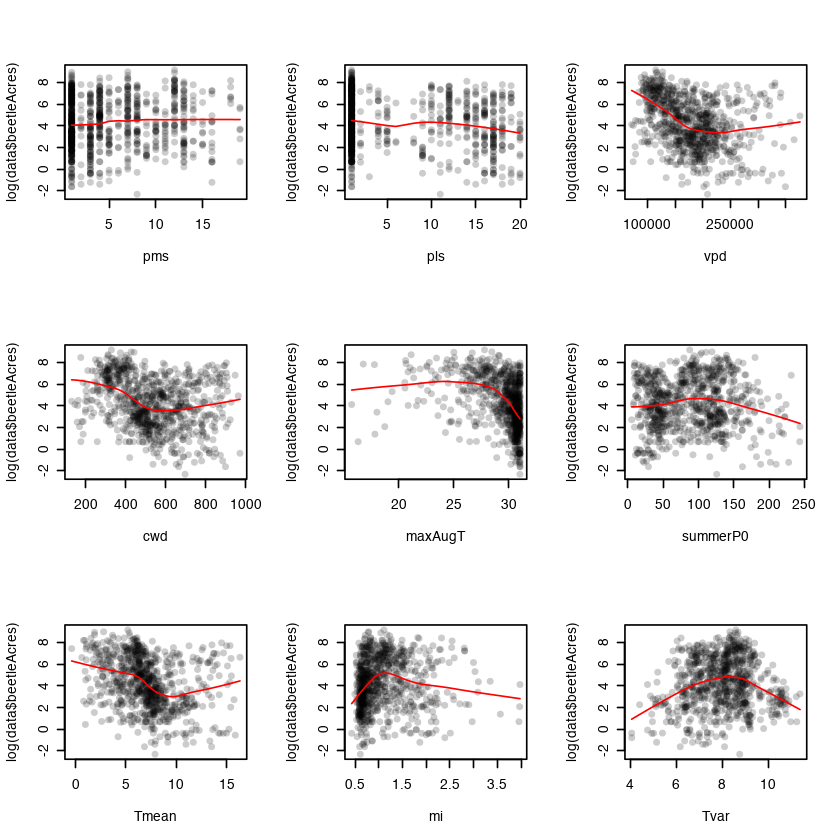

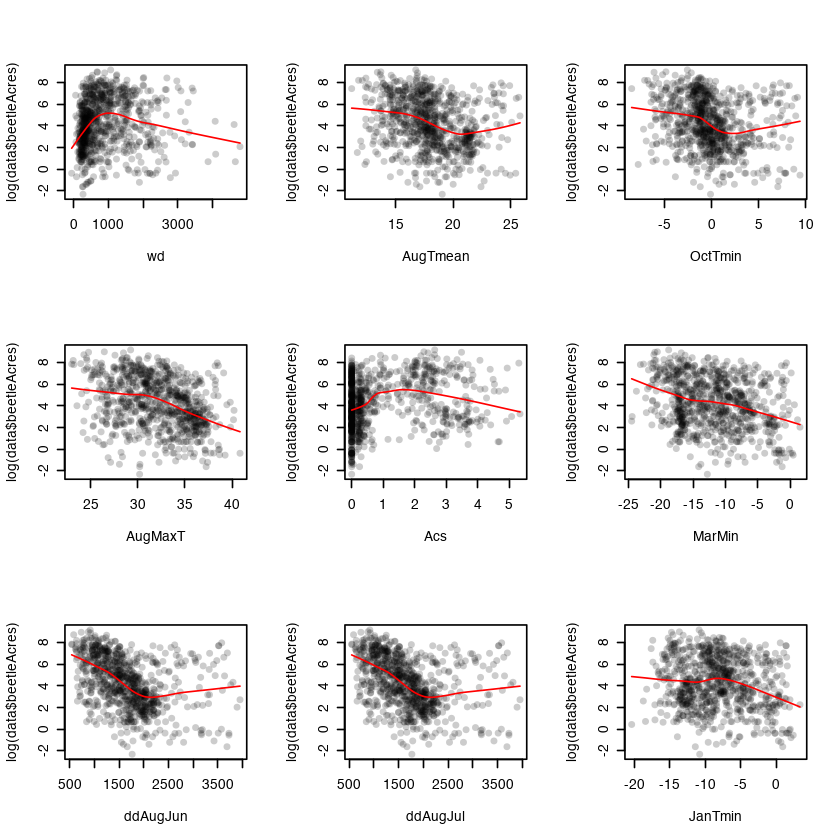

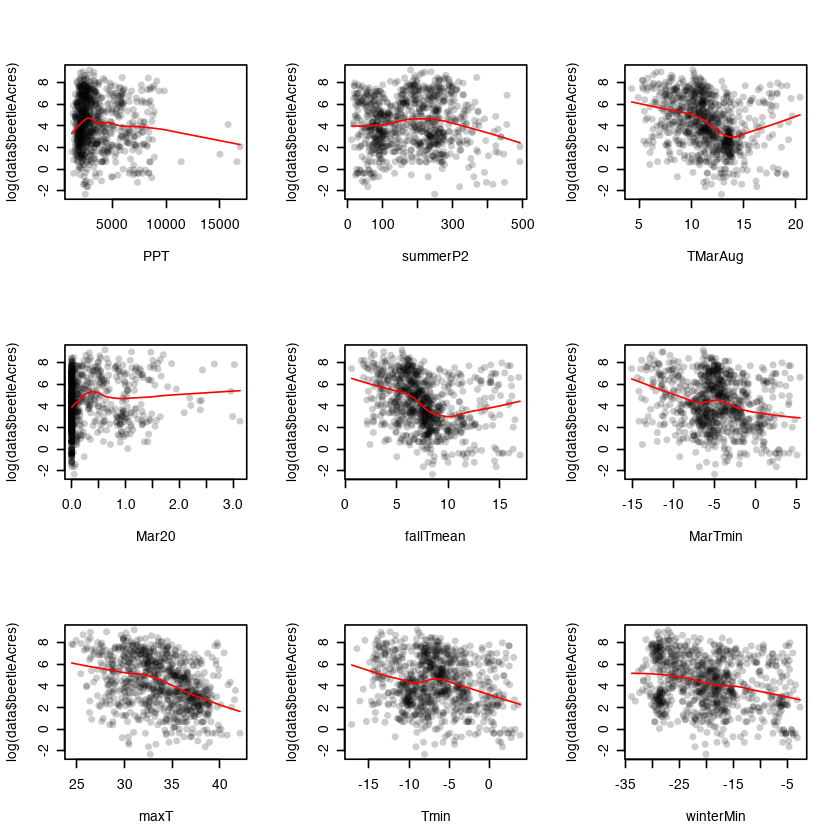

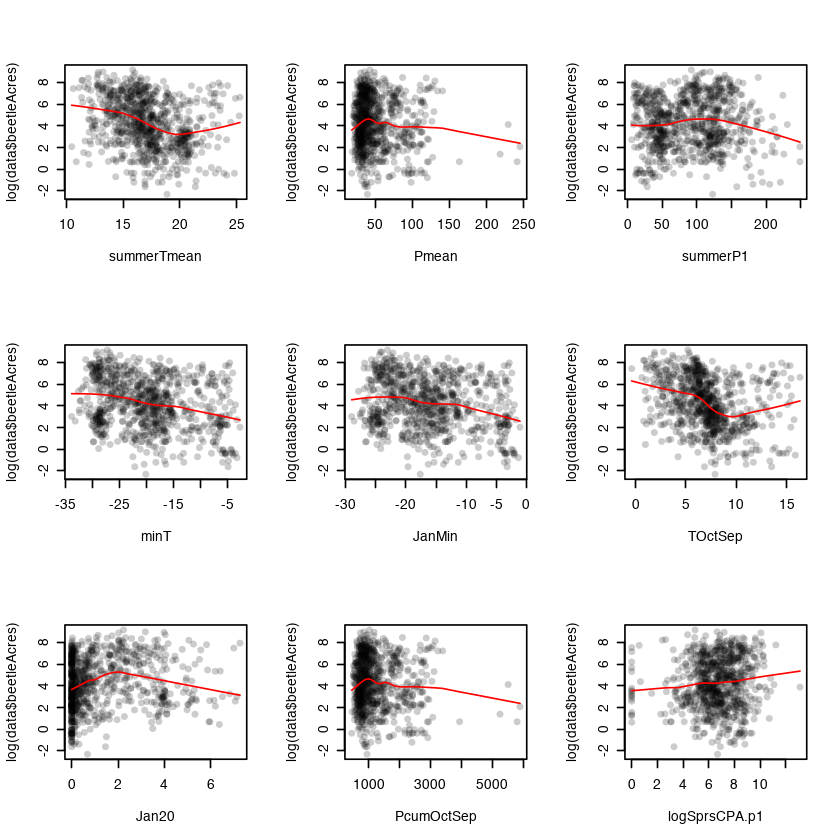

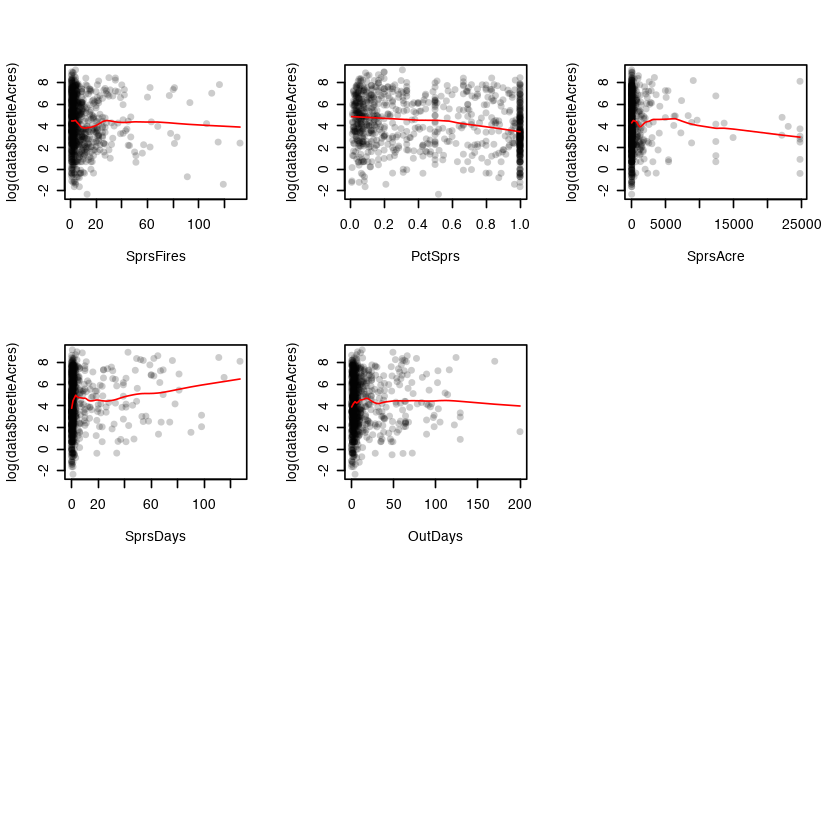

In [52]:
par(mfrow=c(3, 3))
for (field in smoothed) {
  plot(log(data$beetleAcres) ~ data[, field], 
       pch=16, 
       col=rgb(0, 0, 0, 0.2),
       xlab=field)
  lines(lowess(log(data$beetleAcres) ~ data[, field]), col=2)
}

In [21]:
for (field in names(data)) {
  if (field != 'beetleAcres') {
    cat(sprintf('%s + ', field))
  }
}

lon + lat + etopo1 + host + forest + mStdAge + density + PctLarge + PctOld + vcc + mfri + prs + pms + pls + GAP1 + GAP2 + GAP3 + vpd + cwd + maxAugT + summerP0 + Tmean + mi + Tvar + wd + AugTmean + OctTmin + AugMaxT + AugTmax + Acs + MarMin + ddAugJun + ddAugJul + JanTmin + PPT + summerP2 + TMarAug + Mar20 + fallTmean + MarTmin + maxT + Tmin + winterMin + summerTmean + Pmean + summerP1 + minT + JanMin + TOctSep + Jan20 + PcumOctSep + logSprsCPA.p1 + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays + 

In [3]:
bstar = NULL # Rows of bstar will be bootstrap vectors of regression coefficients.
n = dim(data)[1] 
B = 1000
ptm <- proc.time()
for(draw in 1:B){
  # Randomly sample from the rows, with replacement
  Dstar = data[sample(1:n,size=n,replace=T),]
  model <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + PctLarge + PctOld + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) 
    + logSprsCPA.p1 + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays,
    data=Dstar)
  bstar = rbind( bstar,coef(model) )
  # print(draw)
} # Next draw
proc.time() - ptm

   user  system elapsed 
 30.039   0.730  37.380 

In [4]:
bstar <- as.data.frame(bstar)

In [5]:
head(bstar)

(Intercept) lon        I(lon^2)      lat      I(lat^2)    etopo1       
1  -48.71444   0.6039342  0.0034761132 3.788690 -0.04918346  0.0010160288
2  -39.76846   0.9296111  0.0048912521 1.602052 -0.02087886 -0.0004469767
3 -147.77186  -1.3444059 -0.0057261118 5.108407 -0.05963187  0.0006146911
4 -163.80386  -0.4599534 -0.0004359683 5.406306 -0.07116869 -0.0015387117
5 -126.55655  -1.2522792 -0.0053765387 2.801980 -0.03129111 -0.0007563598
6  -39.11347   1.9478156  0.0090078420 5.461805 -0.06833981 -0.0009817454
  I(etopo1^2)  mStdAge      I(mStdAge^2)  density      ⋯ Jan20      I(Jan20^2)
1 2.052819e-07  0.002510373 -7.564069e-06 6.168771e-05 ⋯ -0.8699227 0.13573879
2 6.647040e-07 -0.001344715  1.506373e-05 3.406338e-05 ⋯ -0.6384062 0.15823381
3 1.272550e-07  0.005027461 -1.715612e-05 6.502773e-05 ⋯ -0.5354732 0.09706121
4 8.807938e-07 -0.003136788  1.383732e-05 7.139209e-05 ⋯ -0.2012063 0.15843061
5 4.206740e-07  0.005436704 -1.232607e-05 6.463806e-05 ⋯ -0.7423505 0.10589972
6 7.618356e-07 -0.002848225  1.588791e-05 4.432926e-05 ⋯ -0.6487485 0.14429143
  PcumOctSep   I(PcumOctSep^2) logSprsCPA.p1 SprsFires  PctSprs   
1 -0.035322294  8.140946e-06    0.059414708  0.02835690 -0.8426129
2 -0.035045622 -1.191197e-05   -0.052292637  0.02229644 -1.1208788
3 -0.132606305  1.930554e-05    0.039550773  0.02947327 -0.5744049
4 -0.250408947  6.673071e-05   -0.023135027  0.03282553 -1.0476477
5 -0.006090509 -2.656863e-05    0.064149352  0.02215137 -0.9163241
6 -0.086545177  1.555355e-05   -0.001545118  0.03245241 -0.6940231
  SprsAcre      SprsDays      OutDays      
1 -6.062359e-05 -0.0001082081  0.0015516713
2 -6.464743e-05 -0.0046867926  0.0037368874
3 -4.034127e-05 -0.0006398907  0.0044772356
4 -3.648324e-06 -0.0050483132 -0.0002602122
5 -8.885635e-05 -0.0027784163  0.0068404449
6 -4.838897e-05 -0.0060061779  0.0068937862

In [6]:
dim(bstar)
names(bstar)

[1] 1000   91

[1] "(Intercept)"     "lon"             "I(lon^2)"        "lat"            
 [5] "I(lat^2)"        "etopo1"          "I(etopo1^2)"     "mStdAge"        
 [9] "I(mStdAge^2)"    "density"         "I(density^2)"    "PctLarge"       
[13] "PctOld"          "vcc"             "log(vcc)"        "mfri"           
[17] "log(mfri)"       "prs"             "I(prs^2)"        "pms"            
[21] "pls"             "GAP1"            "GAP2"            "GAP3"           
[25] "vpd"             "I(vpd^2)"        "cwd"             "I(cwd^2)"       
[29] "maxAugT"         "I(maxAugT^2)"    "I(summerP0^2)"   "summerP0"       
[33] "Tmean"           "I(Tmean^2)"      "exp(Tmean)"      "mi"             
[37] "I(mi^2)"         "Tvar"            "I(Tvar^2)"       "wd"             
[41] "I(wd^2)"         "AugTmean"        "I(AugTmean^2)"   "OctTmin"        
[45] "I(OctTmin^2)"    "AugMaxT"         "I(AugMaxT^2)"    "AugTmax"        
[49] "Acs"             "I(Acs^2)"        "MarMin"          "ddAugJun"       
[53] "I(ddAugJun^2)"   "ddAugJul"        "I(ddAugJul^2)"   "JanTmin"        
[57] "PPT"             "I(PPT^2)"        "summerP2"        "I(summerP2^2)"  
[61] "TMarAug"         "exp(TMarAug)"    "Mar20"           "log(Mar20 + 1)" 
[65] "fallTmean"       "exp(fallTmean)"  "MarTmin"         "maxT"           
[69] "I(maxT^2)"       "Tmin"            "winterMin"       "summerTmean"    
[73] "Pmean"           "I(Pmean^2)"      "summerP1"        "I(summerP1^2)"  
[77] "minT"            "JanMin"          "I(JanMin^2)"     "TOctSep"        
[81] "exp(TOctSep)"    "Jan20"           "I(Jan20^2)"      "PcumOctSep"     
[85] "I(PcumOctSep^2)" "logSprsCPA.p1"   "SprsFires"       "PctSprs"        
[89] "SprsAcre"        "SprsDays"        "OutDays"

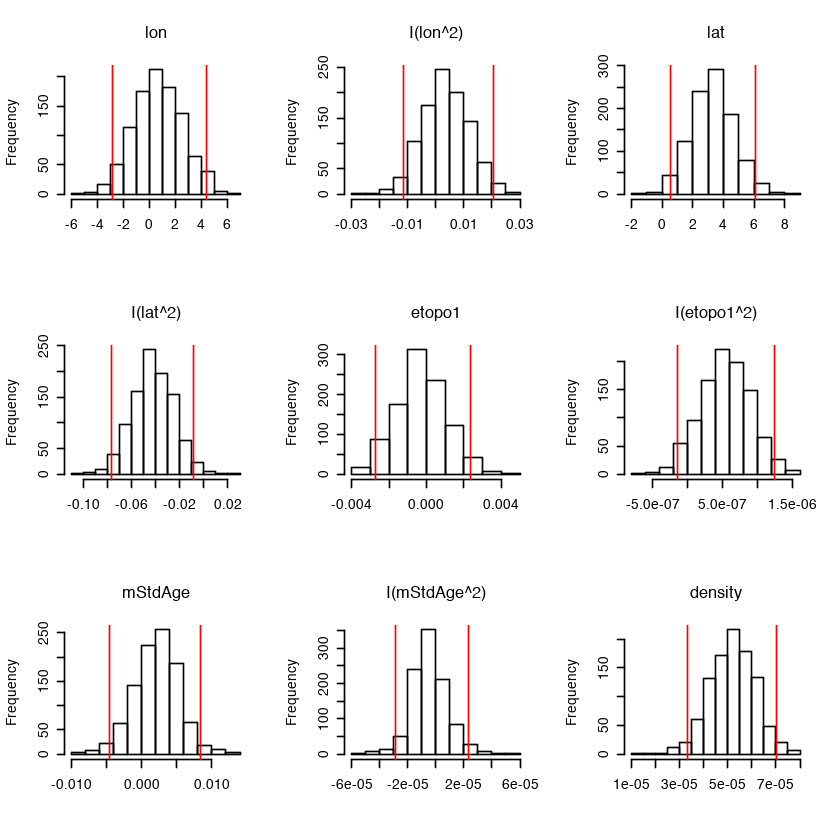

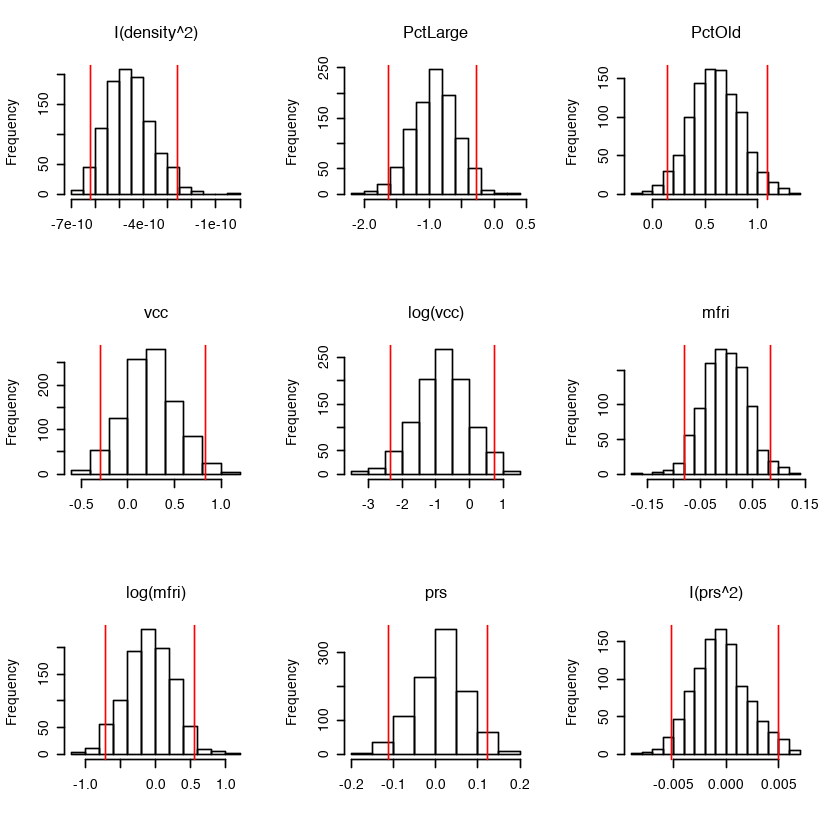

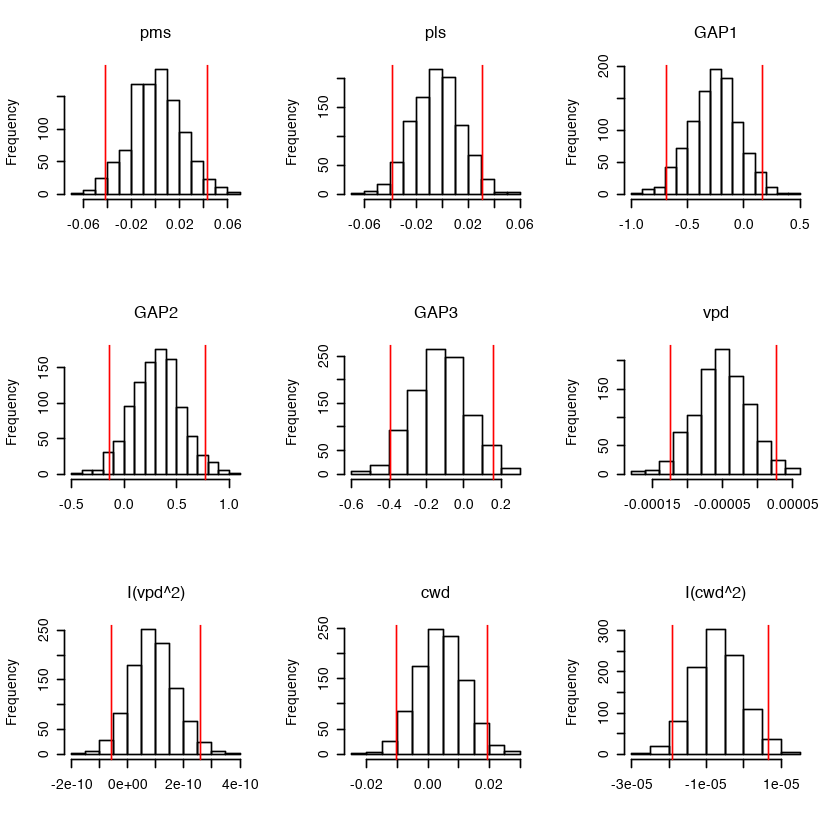

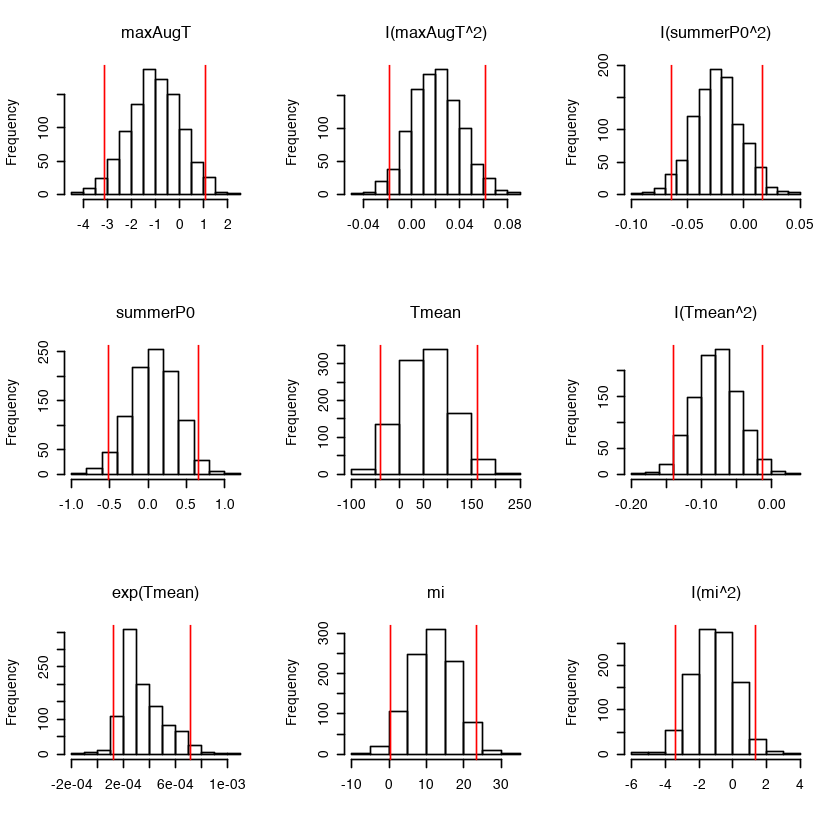

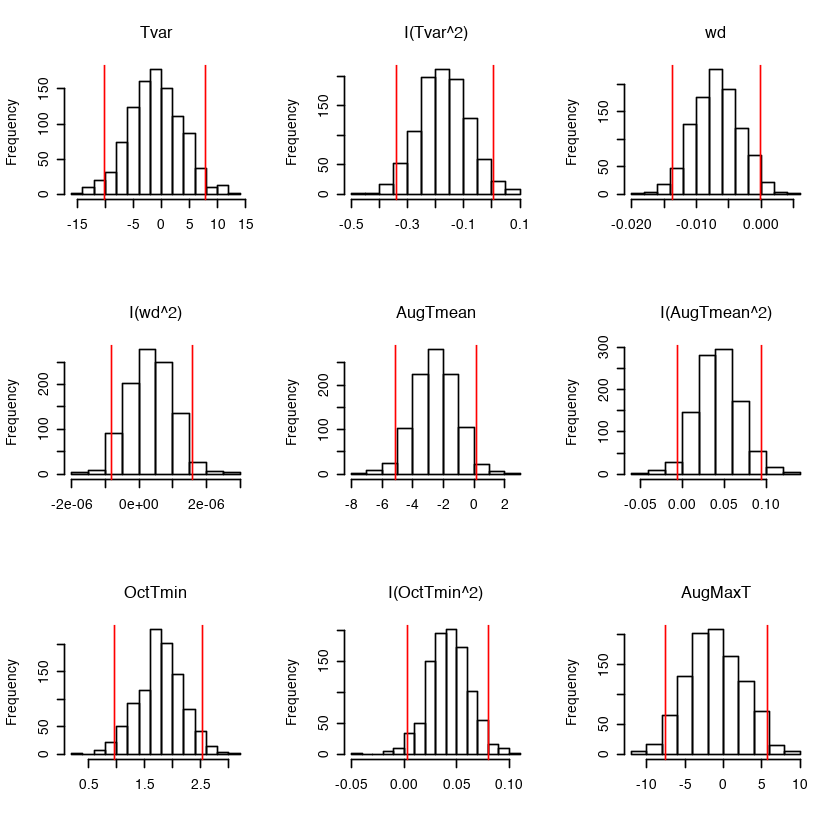

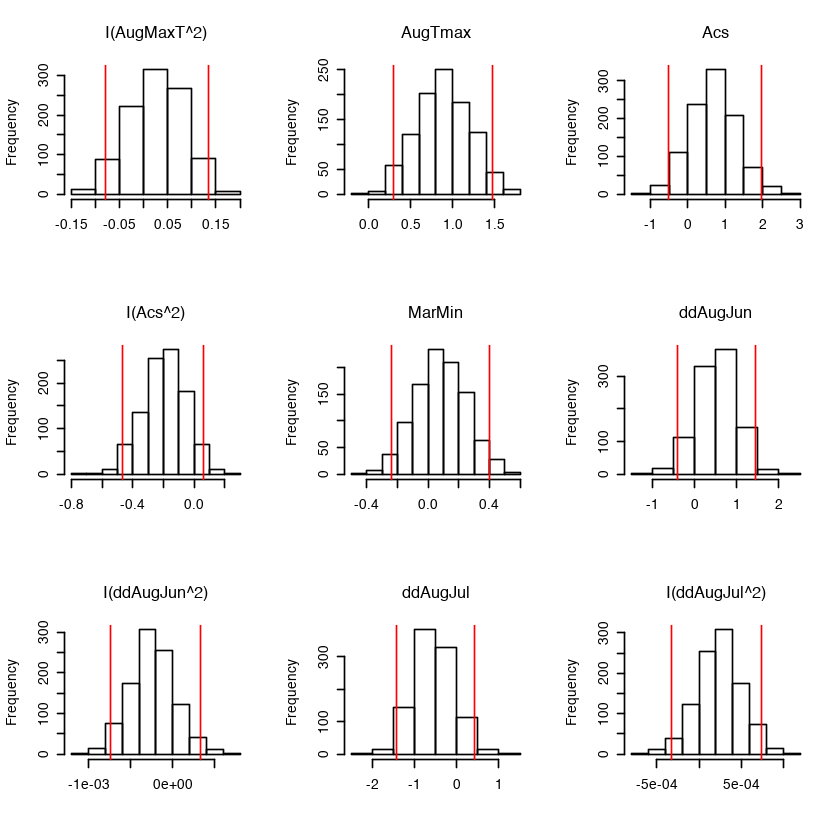

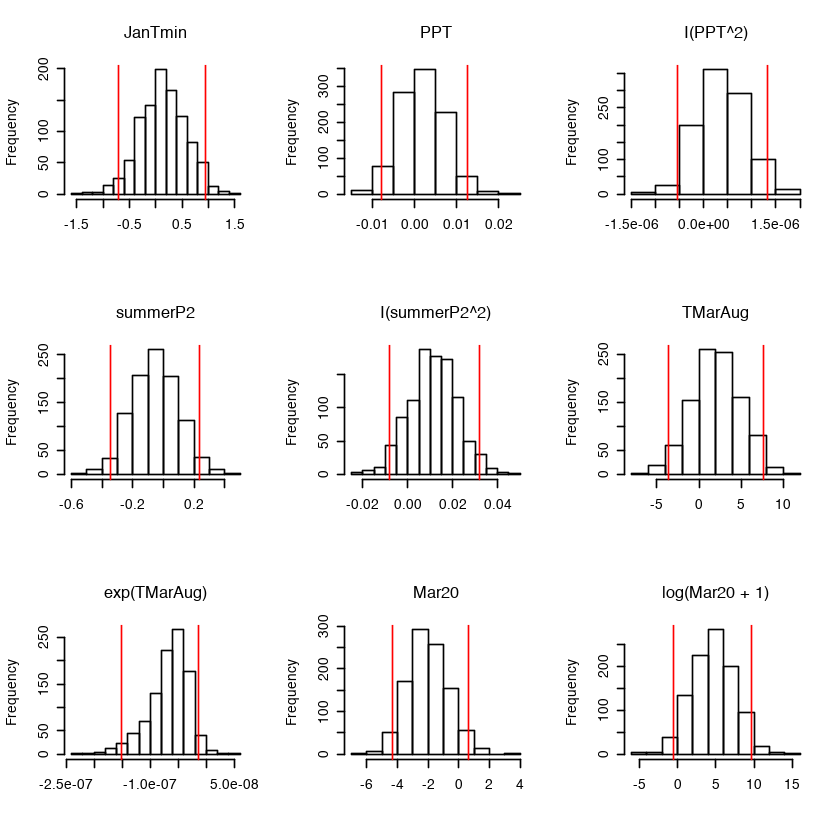

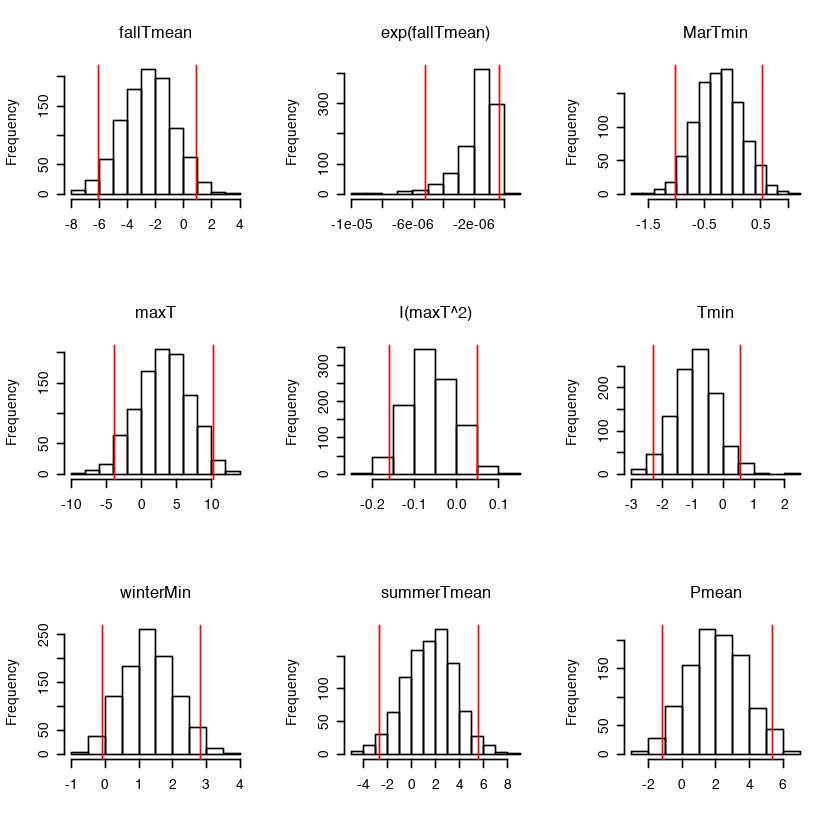

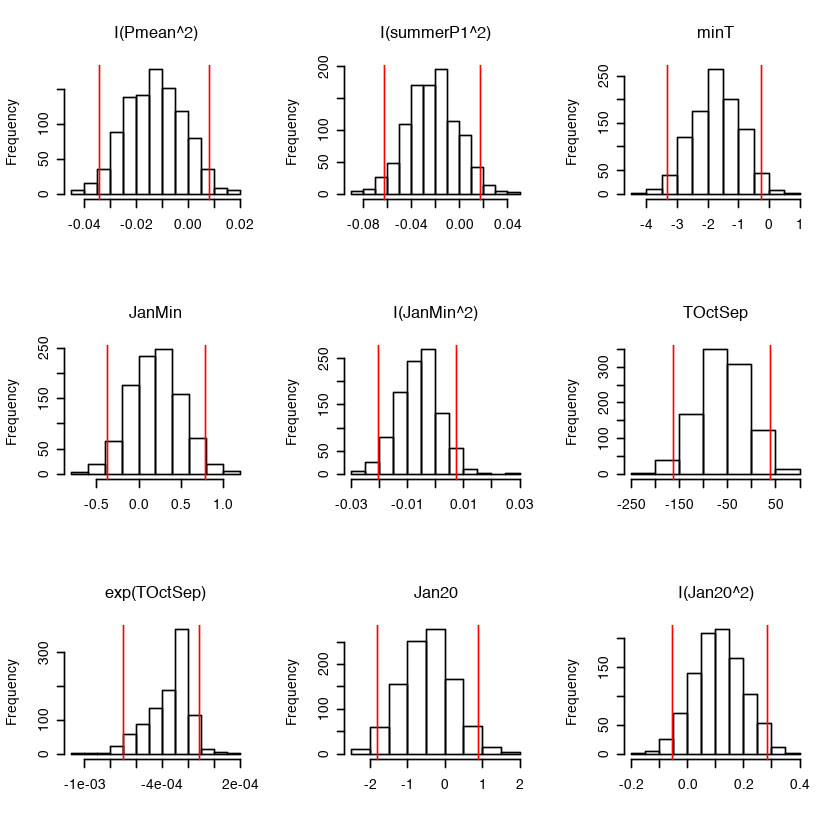

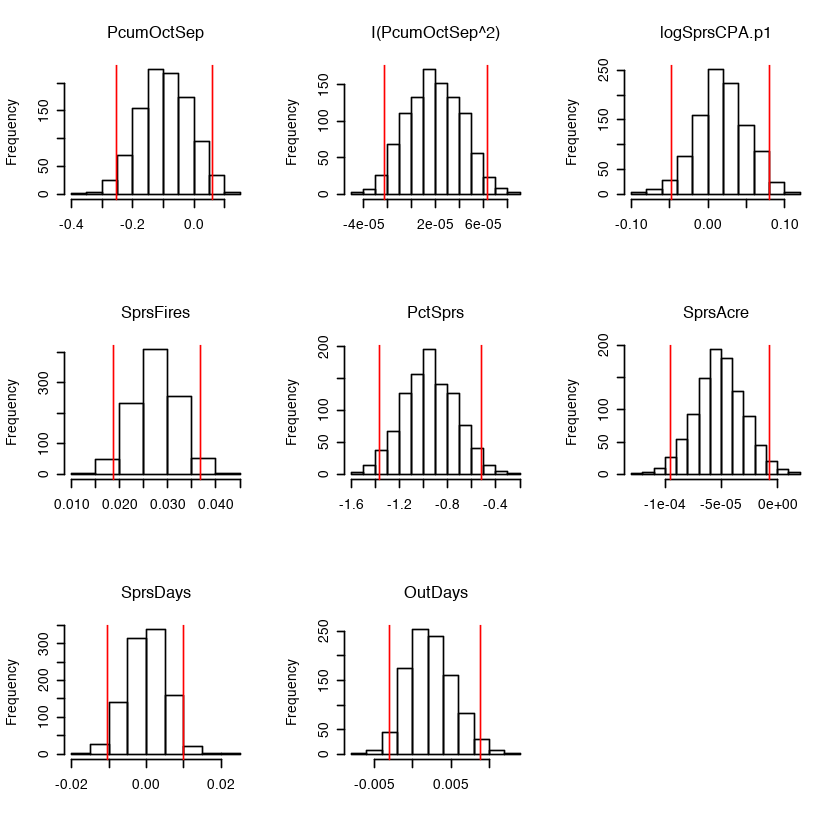

In [8]:
par(mfrow=c(3, 3))
for (field in names(bstar)) {
    if(!(field %in% c('(Intercept)', 'summerP1'))){
        hist(bstar[,field], main=field, xlab='')
        qs <- quantile(bstar[,field], prob=c(0.025, 0.975))
        abline(v=qs[1],col="red")
        abline(v=qs[2],col="red")
    }
}

remove these variables in the model?
'lon' 'I(lon^2)' 'etopo1' 'I(etopo1^2)' 'mStdAge' 'I(mStdAge^2)' 'vcc' 'log(vcc)' 'mfri' 'log(mfri)' 'prs' 'I(prs^2)' 'pms' 'pls' 'GAP1' 'GAP2' 'GAP3' I(vpd^2) 'cwd' 'I(cwd^2)' 'maxAugT' 'I(maxAugT^2)' 'I(summerP0^2)' 'summerP0' 'Tmean' 'mi' 'I(mi^2)' 'Tvar' 'I(Tvar^2)' 'wd' 'I(wd^2)' 'AugTmean' 'I(AugTmean^2)' 'AugMaxT' 'I(AugMaxT^2)' 'Acs' 'I(Acs^2)' 'MarMin' 'ddAugJun' 'I(ddAugJun^2)' 'ddAugJul' 'I(ddAugJul^2)' 'JanTmin' 'PPT' 'I(PPT^2)' 'summerP2' 'I(summerP2^2)' 'TMarAug' 'exp(TMarAug)' 'Mar20' 'log(Mar20 + 1)' 'fallTmean' 'MarTmin' 'maxT' 'I(maxT^2)' 'Tmin' 'winterMin' 'summerTmean' 'Pmean' 'I(Pmean^2)' 'summerP1' 'I(summerP1^2)' 'JanMin' 'I(JanMin^2)' 'TOctSep' 'Jan20' 'I(Jan20^2)' 'PcumOctSep' 'I(PcumOctSep^2)' 'logSprsCPA.p1' 'SprsDays' 'OutDays'

mod <- lm(
  log(beetleAcres) ~ lat + I(lat^2) + density + I(density^2) + PctLarge + PctOld + vpd  
    + I(Tmean^2) + exp(Tmean) + OctTmin + I(OctTmin^2) + AugTmax + JanTmin + minT
    +  exp(fallTmean) + exp(TOctSep) + SprsFires + PctSprs + SprsAcre, 
    data=data)

In [13]:
mod <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + PctLarge + PctOld + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) 
    + logSprsCPA.p1 + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays,
    data=data)

In [14]:
mod.r <- step(mod, trace=0)

In [15]:
summary(mod.r)


Call:
lm(formula = log(beetleAcres) ~ I(lon^2) + lat + I(lat^2) + I(etopo1^2) + 
    density + I(density^2) + PctLarge + PctOld + GAP2 + I(cwd^2) + 
    I(summerP0^2) + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(Tvar^2) + 
    wd + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + 
    I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + ddAugJun + ddAugJul + 
    I(ddAugJul^2) + I(PPT^2) + summerP2 + I(summerP2^2) + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + maxT + 
    I(maxT^2) + Tmin + winterMin + summerTmean + I(Pmean^2) + 
    minT + JanMin + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + 
    SprsFires + PctSprs + SprsAcre, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4191 -0.9366  0.0830  1.0199  6.4032 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -9.089e+01  1.848e+01  -4.917 1.07e-06 ***
I(lon^2)        4.645e-04  2.732e-04   1.700 0.089457 .  
lat             2.974e+00  7.415e-01   4.0

In [16]:
par(mfrow=c(2, 2))
plot(mod.r)

In [17]:
data$preds <- mod.r$fitted

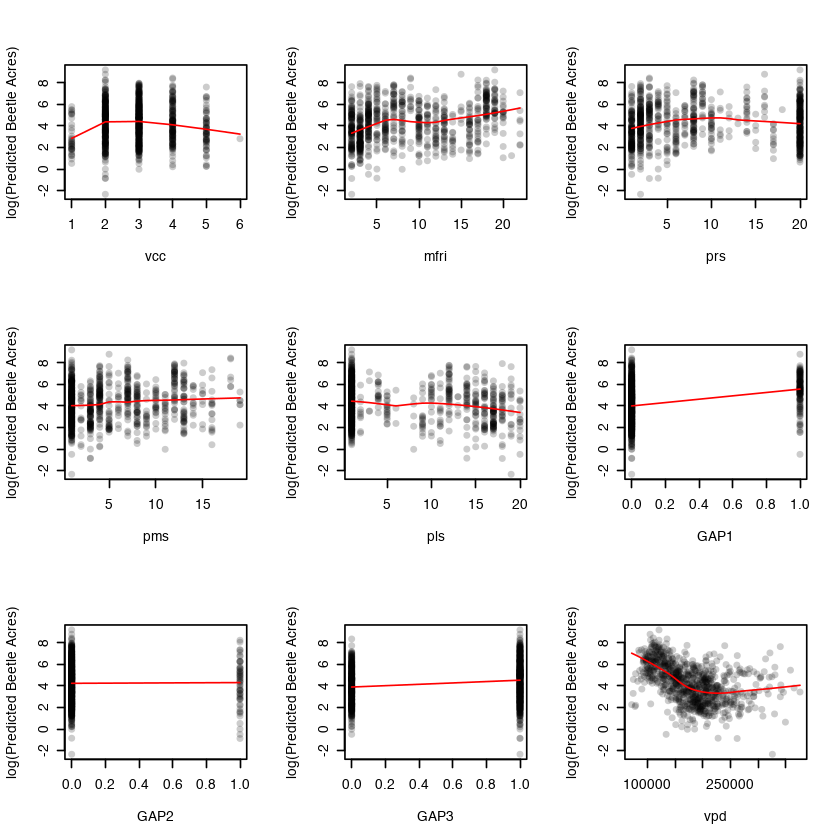

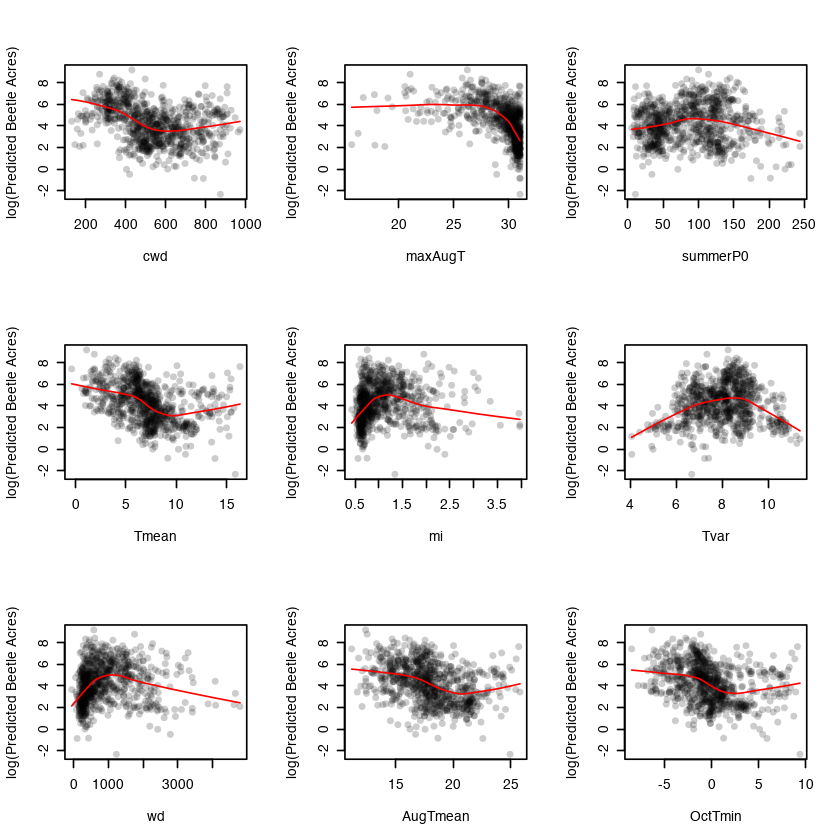

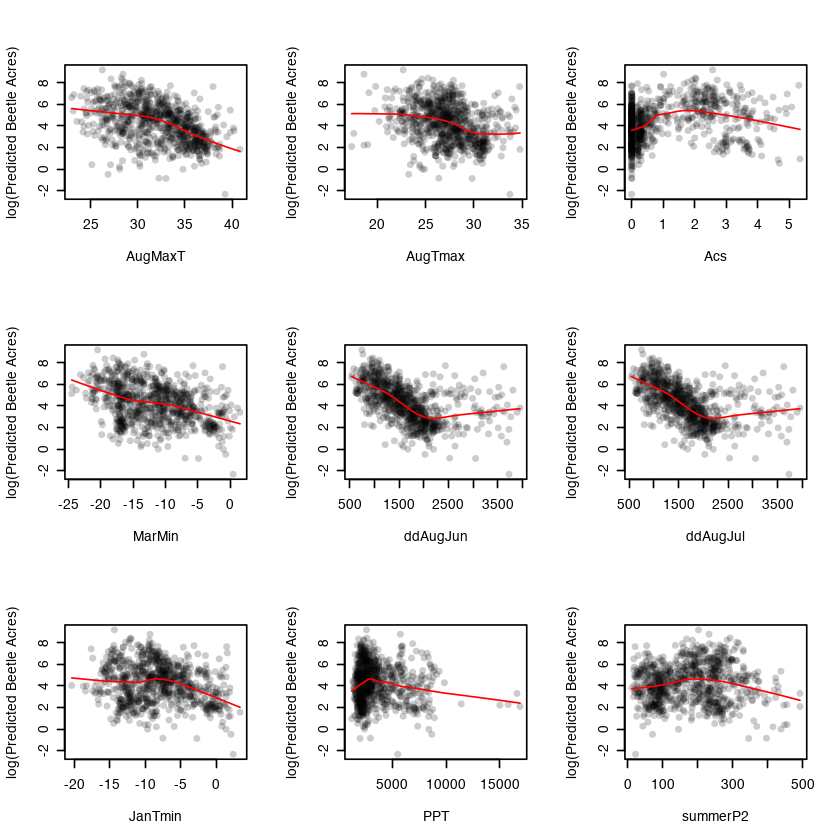

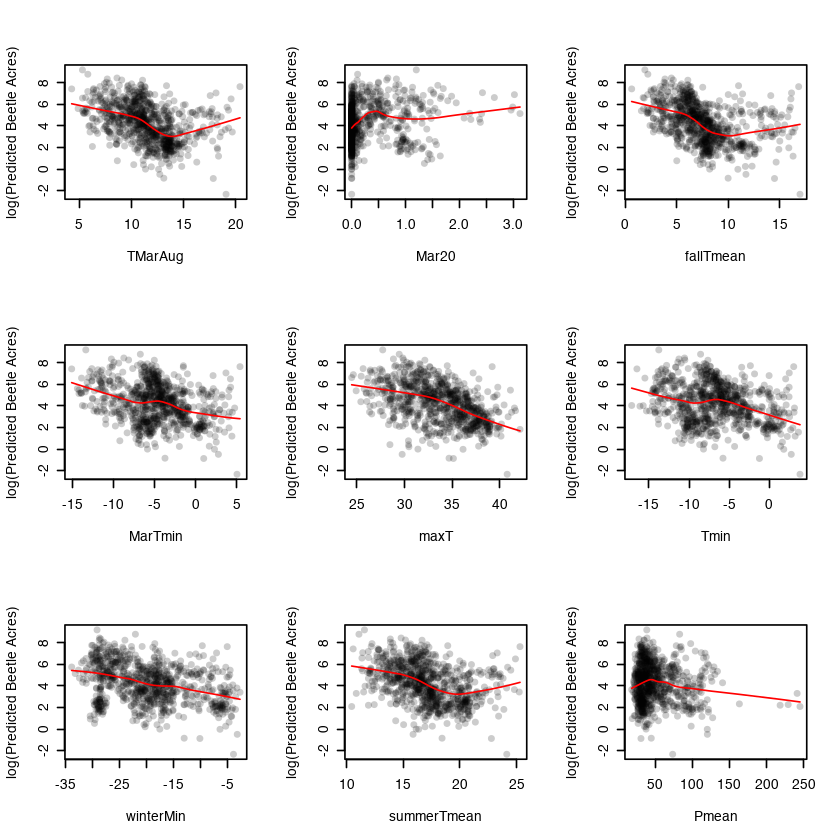

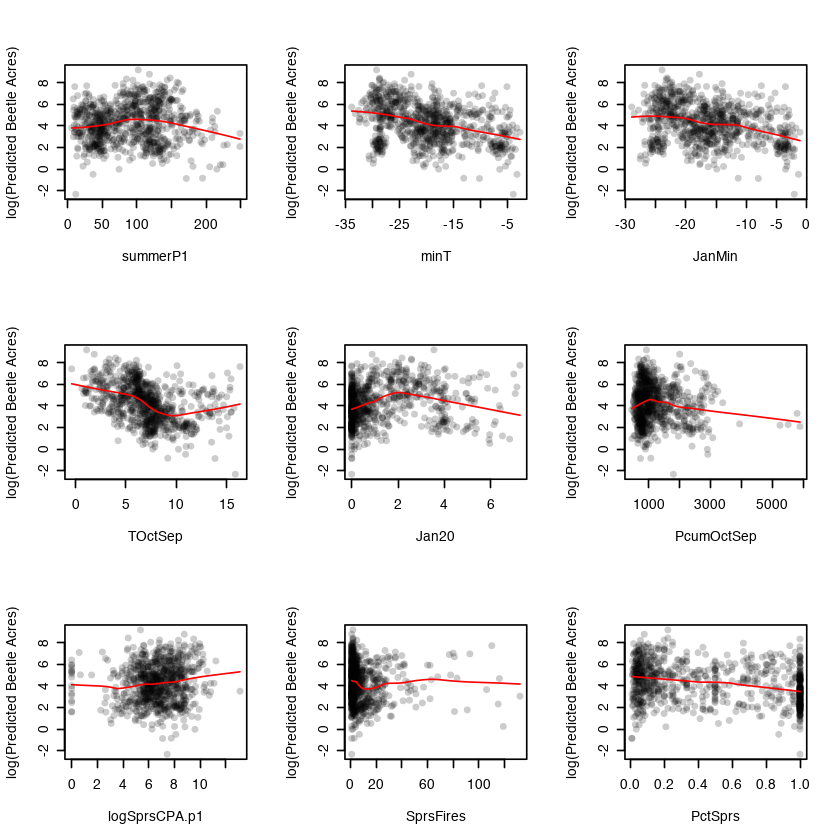

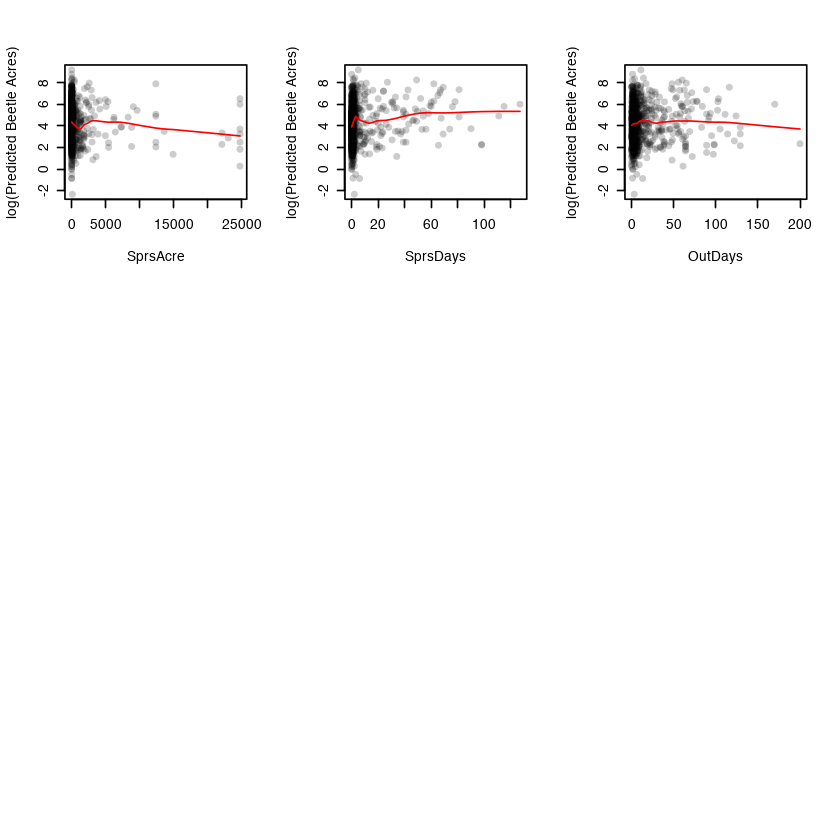

In [19]:
par(mfrow=c(3, 3))
for (field in names(data)) {
  if (!(field %in% c('beetleAcres', 'preds'))) {
    plot(data$preds ~ data[, field], 
         pch=16, 
         col=rgb(0, 0, 0, 0.2), 
         xlab=field,
         ylab='log(Predicted Beetle Acres)')
    lines(lowess(data$preds ~ data[, field]), col=2)
  }
}

In [20]:
med.df <- data.frame(t(apply(data, 2, median)))
n.steps <- 100
med.df <- med.df[rep(1, n.steps), ]

In [21]:
head(med.df)

lon       lat      etopo1  beetleAcres host forest mStdAge  density
1   -114.8248 43.23443 1611.21 70.05422    1    1      87.47312 32493.2
1.1 -114.8248 43.23443 1611.21 70.05422    1    1      87.47312 32493.2
1.2 -114.8248 43.23443 1611.21 70.05422    1    1      87.47312 32493.2
1.3 -114.8248 43.23443 1611.21 70.05422    1    1      87.47312 32493.2
1.4 -114.8248 43.23443 1611.21 70.05422    1    1      87.47312 32493.2
1.5 -114.8248 43.23443 1611.21 70.05422    1    1      87.47312 32493.2
    PctLarge  PctOld    ⋯ TOctSep  Jan20     PcumOctSep logSprsCPA.p1 SprsFires
1   0.2666667 0.4444444 ⋯ 6.944358 0.5472347 970.4981   6.723624      3        
1.1 0.2666667 0.4444444 ⋯ 6.944358 0.5472347 970.4981   6.723624      3        
1.2 0.2666667 0.4444444 ⋯ 6.944358 0.5472347 970.4981   6.723624      3        
1.3 0.2666667 0.4444444 ⋯ 6.944358 0.5472347 970.4981   6.723624      3        
1.4 0.2666667 0.4444444 ⋯ 6.944358 0.5472347 970.4981   6.723624      3        
1.5 0.2666667 0.4444444 ⋯ 6.944358 0.5472347 970.4981   6.723624      3        
    PctSprs SprsAcre SprsDays OutDays preds   
1   0.375   3.914397 1        4       4.264659
1.1 0.375   3.914397 1        4       4.264659
1.2 0.375   3.914397 1        4       4.264659
1.3 0.375   3.914397 1        4       4.264659
1.4 0.375   3.914397 1        4       4.264659
1.5 0.375   3.914397 1        4       4.264659

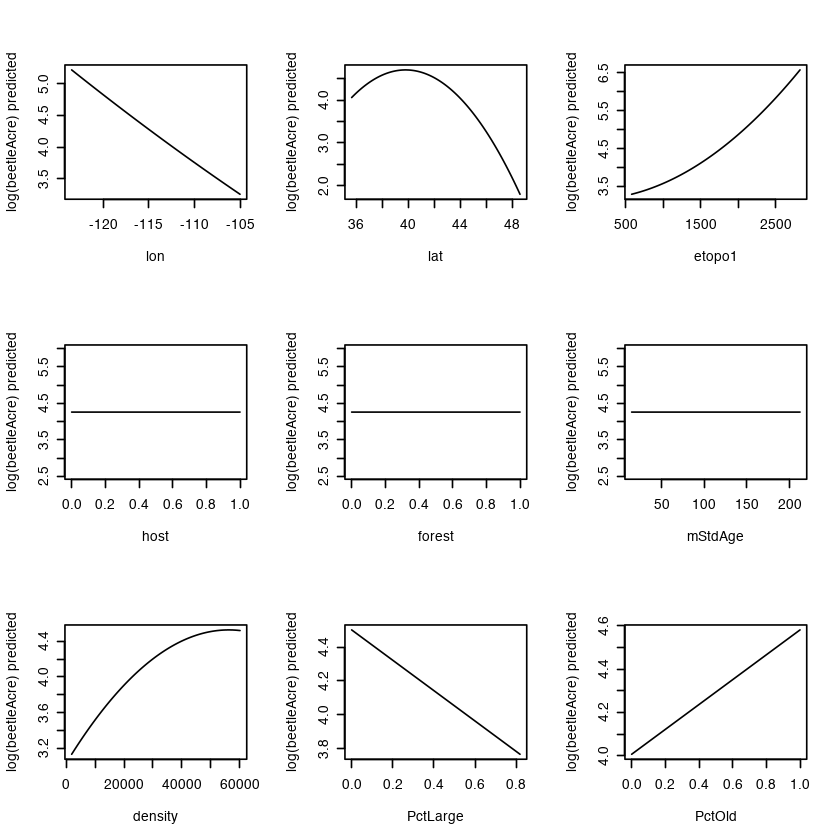

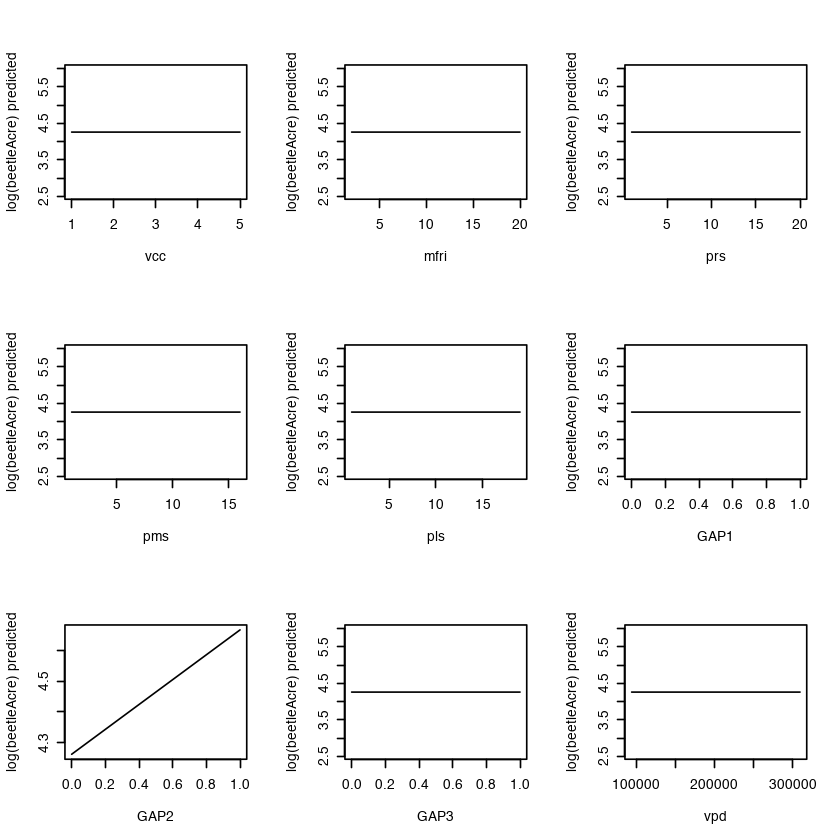

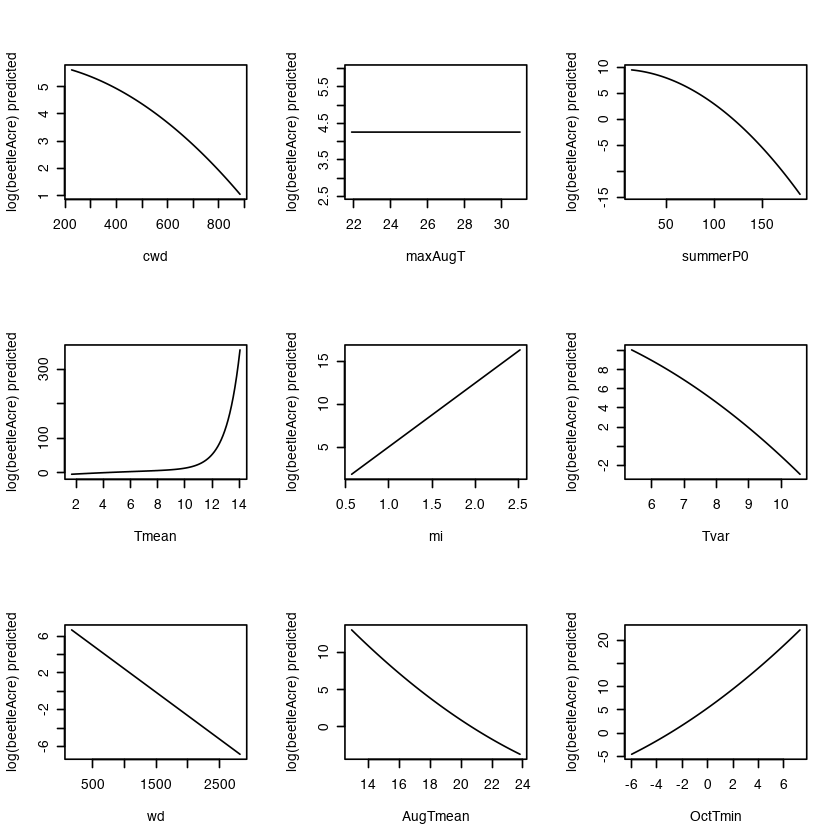

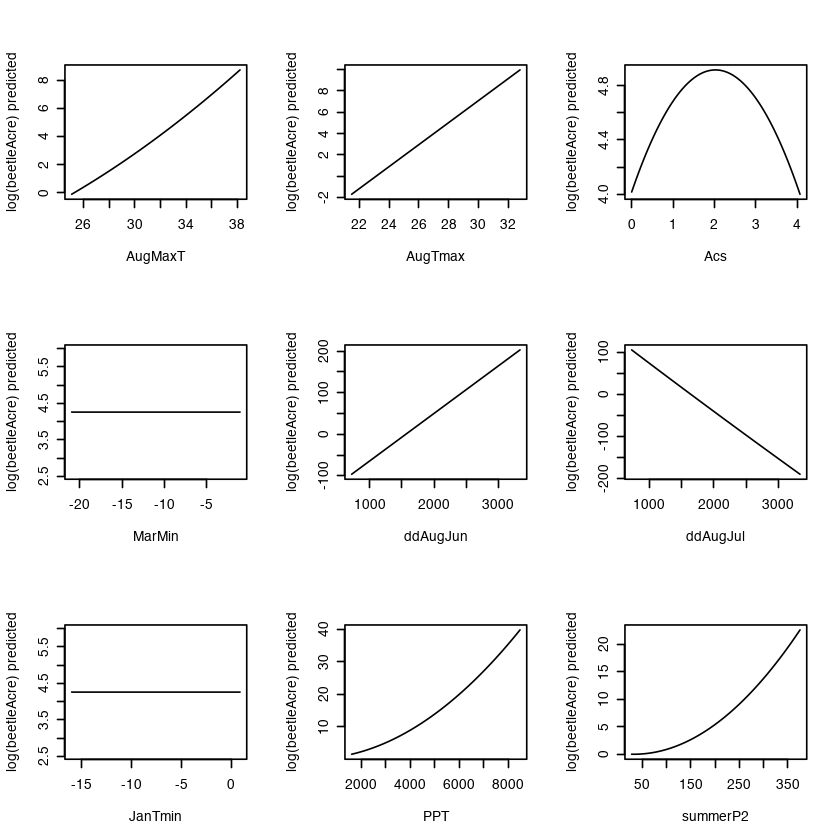

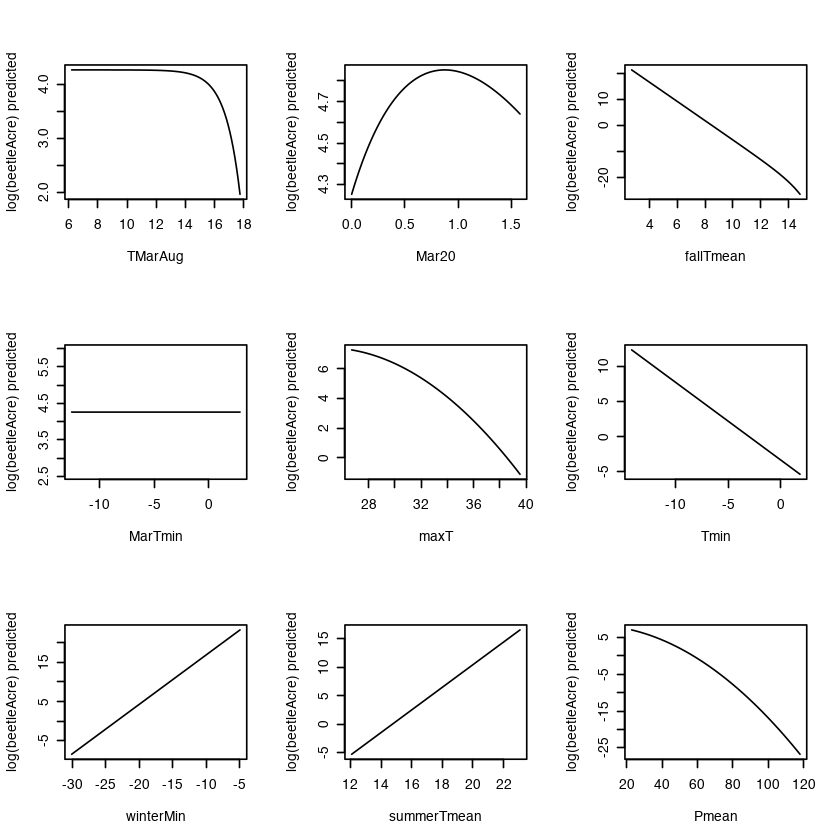

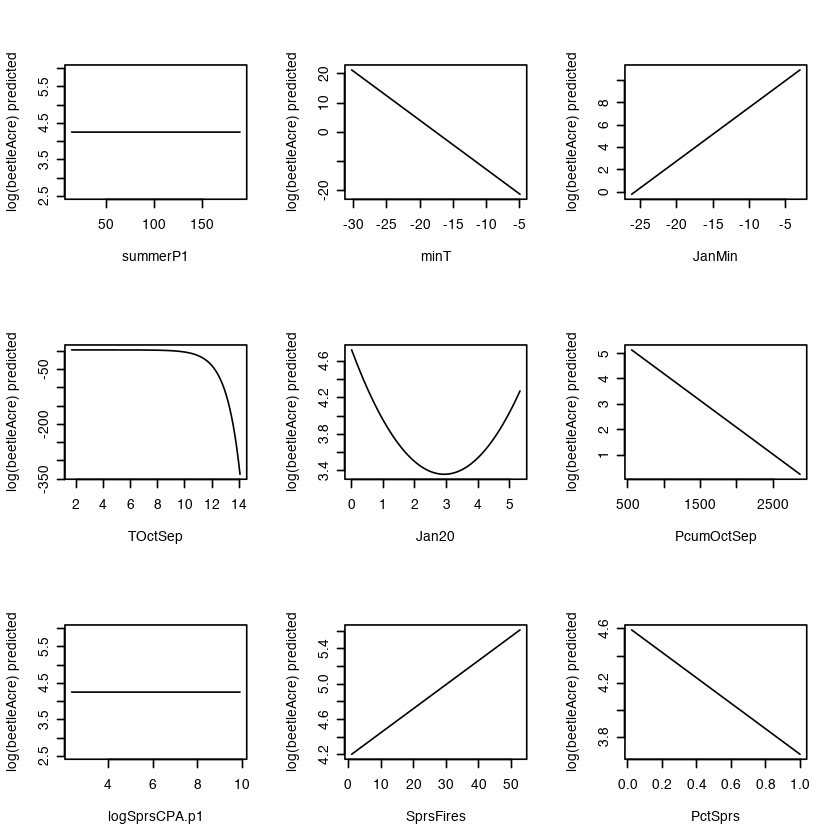

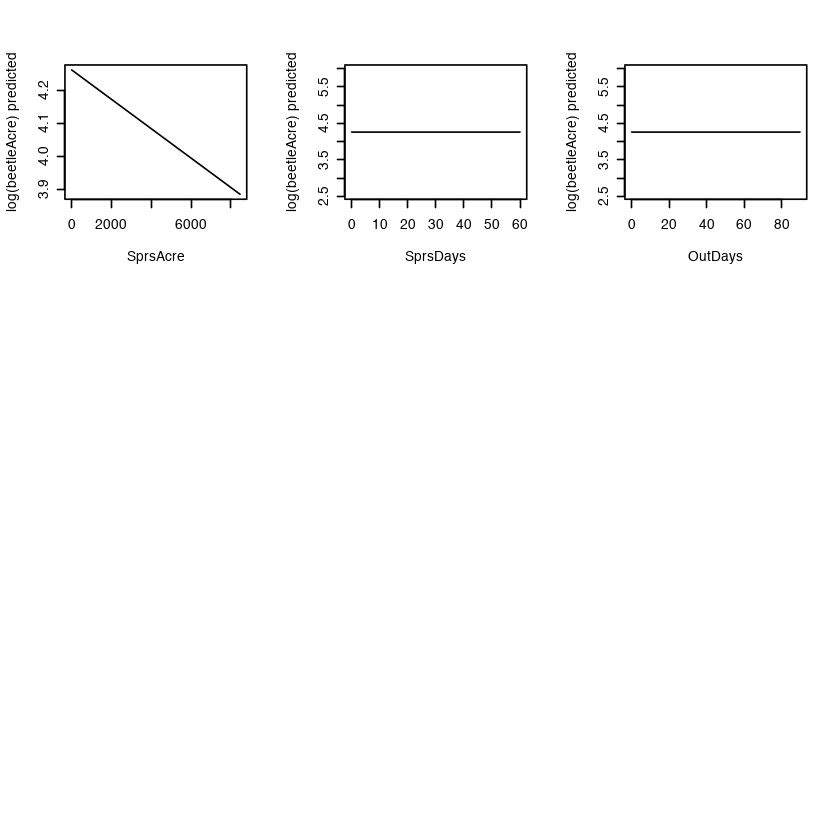

In [22]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- predict(mod.r, newdata=test.df)
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='log(beetleAcre) predicted')
  }
}

In [23]:
range(data$beetleAcres) 

[1]    0.1 9363.3

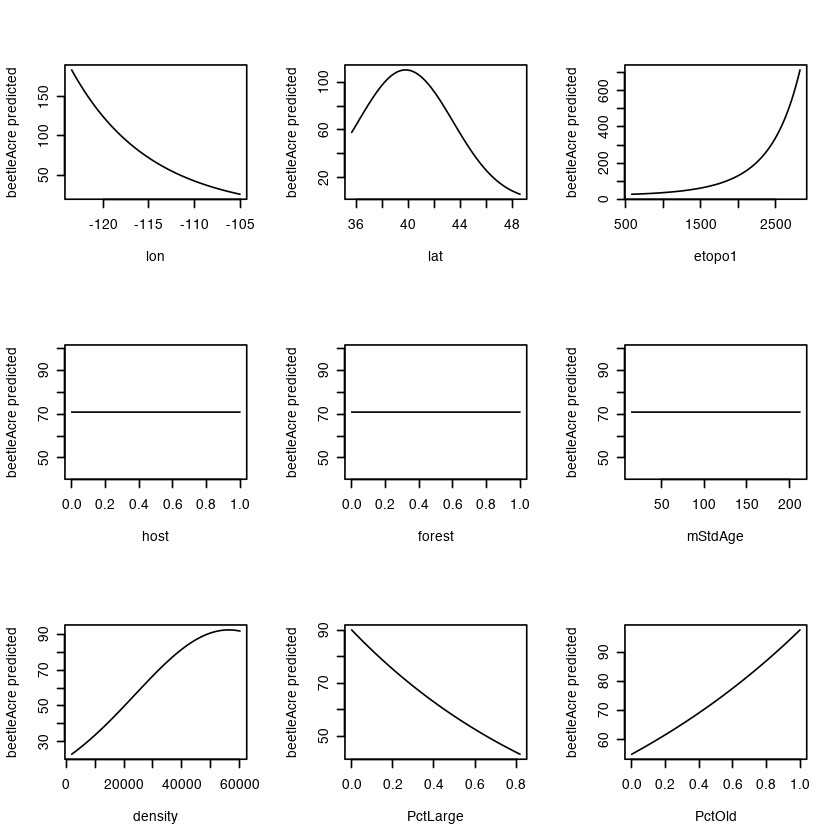

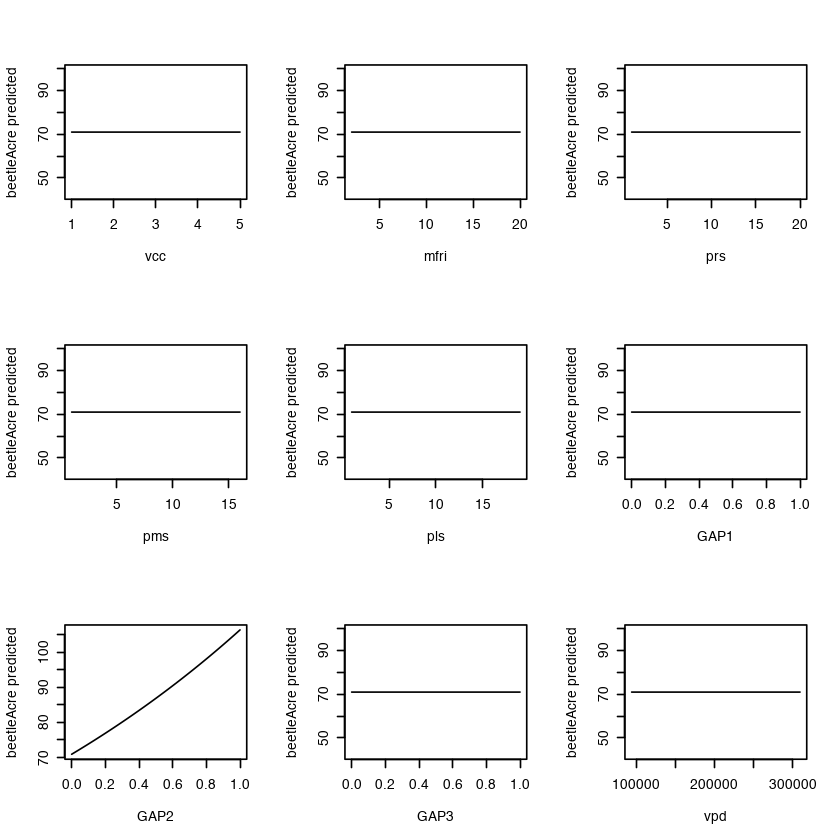

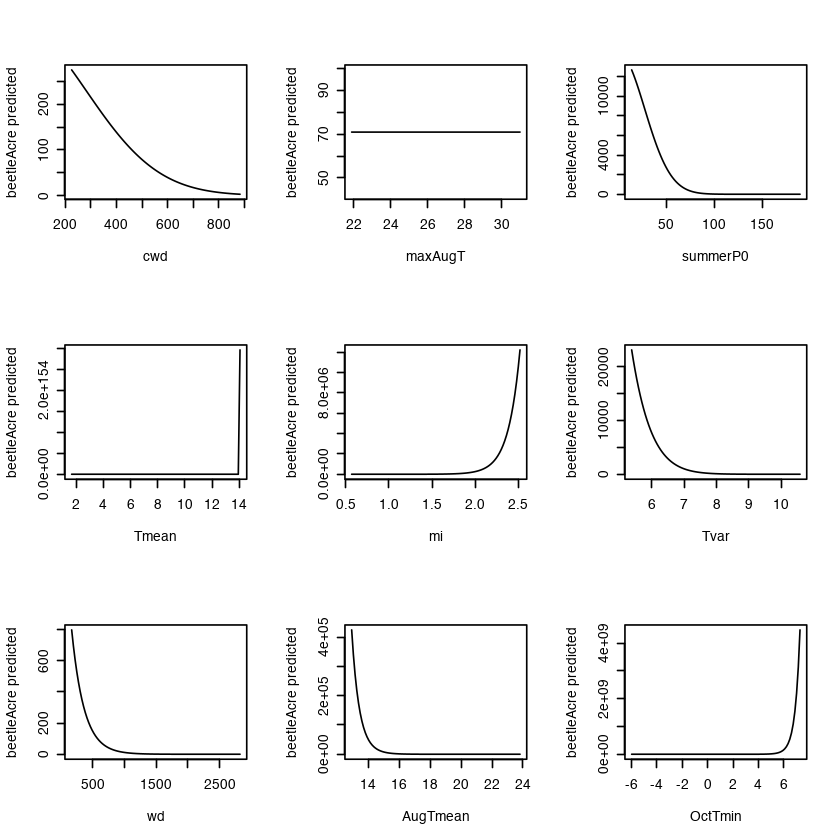

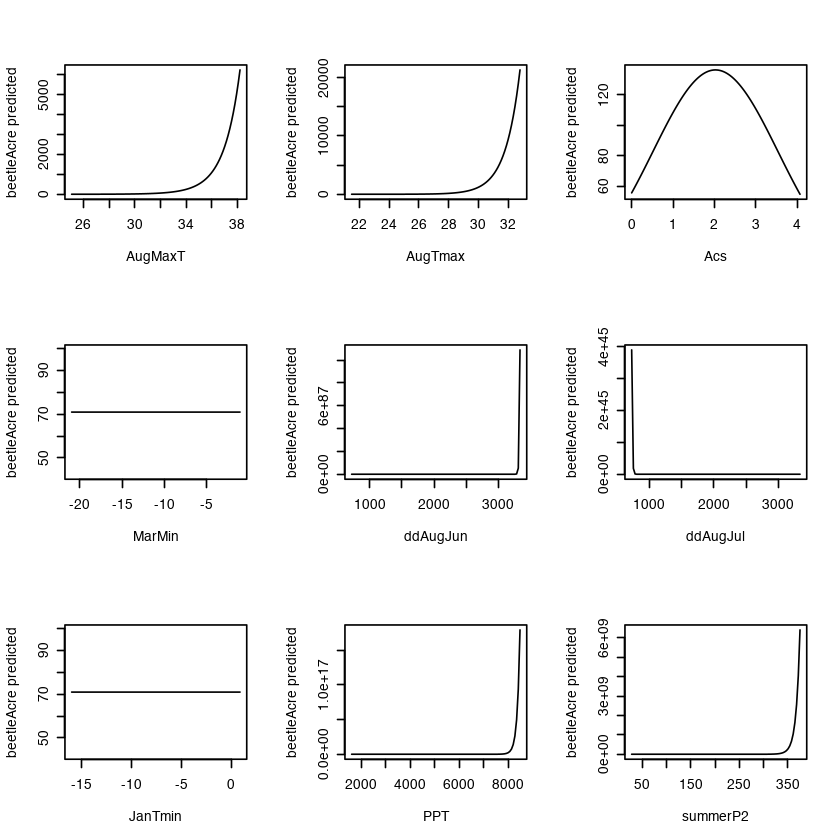

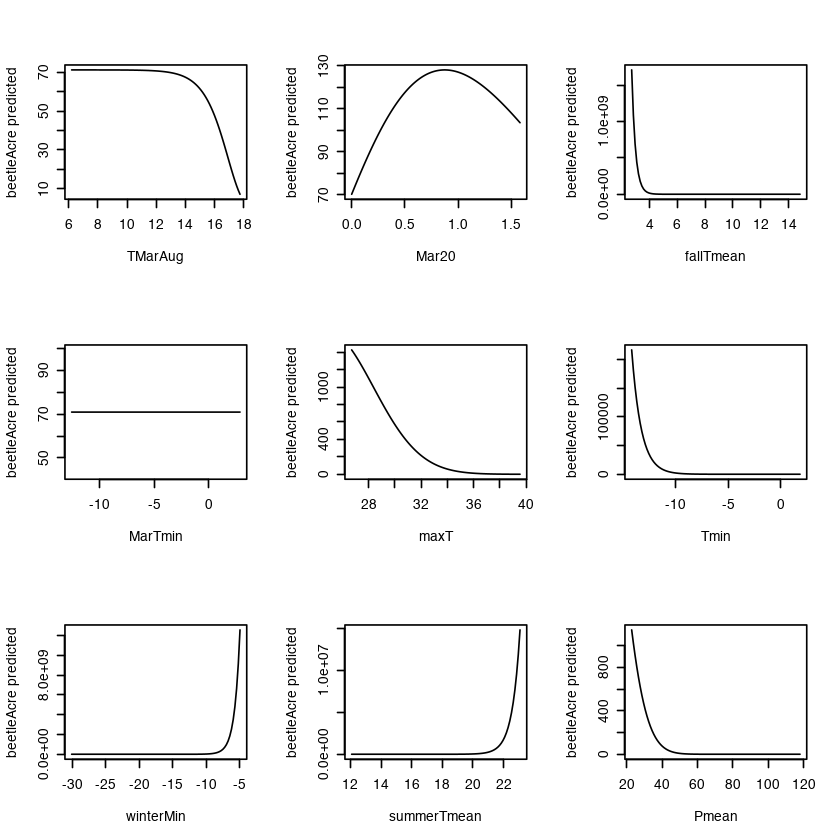

In [24]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- exp(predict(mod.r, newdata=test.df))
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='beetleAcre predicted')
  }
}

In [25]:
sq_terms <- c('lon', 'lat', 'etopo1', 'density', 'cwd', 'summerP0', 'Tmean', 'Tvar', 'AugTmean', 'OctTmin',
              'AugMaxT', 'Acs', 'ddAugJul', 'PPT', 'summerP2', 'maxT', 'Pmean', 'Jan20')
exp_terms <- c('Tmean', 'TMarAug', 'fallTmean', 'TOctSep')
logp1_terms <- 'Mar20'

for(var in sq_terms){
    varnm <- paste0(var, '_sq')
    data[,varnm] <- (data[,var])^2
    cat(sprintf('Calculated %s in a squared term...\n', var))
}

for(var in exp_terms){
    varnm <- paste0(var, '_exp')
    data[,varnm] <- exp(data[,var])
    cat(sprintf('Calculated %s in a exponential term...\n', var))
}

for(var in logp1_terms){
    varnm <- paste0(var, '_logp1')
    data[,varnm] <- log(data[,var]+1)
    cat(sprintf('Calculated %s in a logarithm term...\n', var))
}

Calculated lon in a squared term...
Calculated lat in a squared term...
Calculated etopo1 in a squared term...
Calculated density in a squared term...
Calculated cwd in a squared term...
Calculated summerP0 in a squared term...
Calculated Tmean in a squared term...
Calculated Tvar in a squared term...
Calculated AugTmean in a squared term...
Calculated OctTmin in a squared term...
Calculated AugMaxT in a squared term...
Calculated Acs in a squared term...
Calculated ddAugJul in a squared term...
Calculated PPT in a squared term...
Calculated summerP2 in a squared term...
Calculated maxT in a squared term...
Calculated Pmean in a squared term...
Calculated Jan20 in a squared term...
Calculated Tmean in a exponential term...
Calculated TMarAug in a exponential term...
Calculated fallTmean in a exponential term...
Calculated TOctSep in a exponential term...
Calculated Mar20 in a logarithm term...


In [26]:
selected.vars <- c('lat', 'density', 'PctLarge', 'PctOld', 'GAP2', 'Tmean', 'mi', 'wd', 'AugTmean', 'OctTmin', 
                   'AugTmax', 'Acs', 'ddAugJun', 'ddAugJul', 'summerP2', 'Mar20', 'fallTmean', 'maxT', 'Tmin',
                   'winterMin', 'summerTmean', 'minT', 'JanMin', 'Jan20', 'PcumOctSep','SprsFires', 
                   'PctSprs', 'SprsAcre', paste0(sq_terms, '_sq'), paste0(exp_terms, '_exp'), 
                   paste0(logp1_terms, '_exp'))
predictors <- data[ , (names(data) %in% selected.vars)]
predictors <- scale(predictors)
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- log(df$beetleAcres)

In [27]:
mod <- lm(beetleAcres ~ ., data=df)

In [28]:
mod.r <- step(mod, trace=0)

In [29]:
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lat + density + PctLarge + PctOld + 
    GAP2 + Tmean + mi + wd + AugTmean + OctTmin + AugTmax + Acs + 
    ddAugJun + ddAugJul + summerP2 + fallTmean + maxT + Tmin + 
    winterMin + summerTmean + minT + JanMin + Jan20 + PcumOctSep + 
    SprsFires + PctSprs + SprsAcre + lon_sq + lat_sq + etopo1_sq + 
    density_sq + cwd_sq + summerP0_sq + Tmean_sq + Tvar_sq + 
    AugTmean_sq + OctTmin_sq + AugMaxT_sq + Acs_sq + ddAugJul_sq + 
    PPT_sq + summerP2_sq + maxT_sq + Pmean_sq + Jan20_sq + Tmean_exp + 
    TMarAug_exp + fallTmean_exp + TOctSep_exp, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4340 -0.9477  0.0776  1.0417  6.2816 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.24432    0.05263  80.652  < 2e-16 ***
lat             12.55889    2.87343   4.371 1.41e-05 ***
density          0.90971    0.14259   6.380 3.04e-10 ***
PctLarge        -0.18954    0.06631  -2.858 0.004372 ** 
PctOld  

In [30]:
sort(abs(mod.r$coefficients))

GAP2      SprsAcre        PctOld      PctLarge       PctSprs 
    0.1074197     0.1361743     0.1697865     0.1895377     0.3750789 
    SprsFires        lon_sq    density_sq    OctTmin_sq      Jan20_sq 
    0.4243049     0.6523076     0.7141584     0.7796600     0.8786871 
      density     etopo1_sq        Acs_sq         Jan20      summerP2 
    0.9097062     1.0078450     1.0561151     1.0731422     1.1096001 
       cwd_sq           Acs    PcumOctSep   TMarAug_exp fallTmean_exp 
    1.1903278     1.3521636     1.3836891     1.6683745     1.8690040 
   AugMaxT_sq       AugTmax   ddAugJul_sq       Tvar_sq        JanMin 
    2.5796883     2.8471877     2.9416957     3.1642713     3.1972692 
           wd            mi   (Intercept)      Tmean_sq          Tmin 
    3.8898232     4.0957485     4.2443208     4.4109532     4.7412037 
  AugTmean_sq   summerTmean       OctTmin   summerP0_sq          maxT 
    5.1289835     5.3784402     6.0941727     6.3507146     6.5518669 
  summerP2_sq         Tmean       maxT_sq      AugTmean     winterMin 
    7.2477177     7.2529410     8.9568782     9.2064601    10.0615945 
    fallTmean           lat      Pmean_sq          minT        lat_sq 
   10.6042165    12.5588898    12.7445630    13.0880018    13.1924070 
       PPT_sq      ddAugJun      ddAugJul   TOctSep_exp     Tmean_exp 
   13.7888636    86.9179335    89.2899714   206.3095365   209.7732324

In [31]:
sort(mod.r$coefficients)

TOctSep_exp      ddAugJul        lat_sq          minT      Pmean_sq 
 -206.3095365   -89.2899714   -13.1924070   -13.0880018   -12.7445630 
    fallTmean      AugTmean       maxT_sq   summerP0_sq          Tmin 
  -10.6042165    -9.2064601    -8.9568782    -6.3507146    -4.7412037 
     Tmean_sq            wd       Tvar_sq fallTmean_exp   TMarAug_exp 
   -4.4109532    -3.8898232    -3.1642713    -1.8690040    -1.6683745 
   PcumOctSep        cwd_sq      summerP2         Jan20        Acs_sq 
   -1.3836891    -1.1903278    -1.1096001    -1.0731422    -1.0561151 
   density_sq       PctSprs      PctLarge      SprsAcre          GAP2 
   -0.7141584    -0.3750789    -0.1895377    -0.1361743     0.1074197 
       PctOld     SprsFires        lon_sq    OctTmin_sq      Jan20_sq 
    0.1697865     0.4243049     0.6523076     0.7796600     0.8786871 
      density     etopo1_sq           Acs    AugMaxT_sq       AugTmax 
    0.9097062     1.0078450     1.3521636     2.5796883     2.8471877 
  ddAugJul_sq        JanMin            mi   (Intercept)   AugTmean_sq 
    2.9416957     3.1972692     4.0957485     4.2443208     5.1289835 
  summerTmean       OctTmin          maxT   summerP2_sq         Tmean 
    5.3784402     6.0941727     6.5518669     7.2477177     7.2529410 
    winterMin           lat        PPT_sq      ddAugJun     Tmean_exp 
   10.0615945    12.5588898    13.7888636    86.9179335   209.7732324

In [32]:
mod <- glm(beetleAcres ~ ., family = gaussian(), data=df)
summary(mod)


Call:
glm(formula = beetleAcres ~ ., family = gaussian(), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.4484  -0.9398   0.0728   1.0419   6.2470  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.24432    0.05263  80.643  < 2e-16 ***
lat             12.52024    2.87406   4.356 1.50e-05 ***
density          0.91956    0.14301   6.430 2.23e-10 ***
PctLarge        -0.18876    0.06632  -2.846 0.004542 ** 
PctOld           0.16945    0.06155   2.753 0.006042 ** 
GAP2             0.10855    0.05662   1.917 0.055609 .  
Tmean            6.90383    2.38842   2.891 0.003953 ** 
mi               3.97123    0.84406   4.705 3.01e-06 ***
wd              -3.78221    0.78713  -4.805 1.86e-06 ***
AugTmean        -9.06409    2.52585  -3.589 0.000353 ***
OctTmin          6.12100    0.85819   7.132 2.26e-12 ***
AugTmax          2.84086    0.57472   4.943 9.43e-07 ***
Acs              1.25791    0.60206   2.089 0.037002 *  
ddA

In [33]:
sort(abs(mod$coefficients))

GAP2      SprsAcre        PctOld         Mar20      PctLarge 
    0.1085469     0.1338636     0.1694483     0.1742055     0.1887609 
      PctSprs     SprsFires        lon_sq    density_sq    OctTmin_sq 
    0.3779091     0.4261127     0.6880232     0.7192051     0.7558655 
        Jan20      Jan20_sq       density     etopo1_sq        Acs_sq 
    0.8809252     0.8997576     0.9195563     0.9908654     1.0229956 
     summerP2        cwd_sq           Acs    PcumOctSep   TMarAug_exp 
    1.2012925     1.2342529     1.2579092     1.3735102     1.6622492 
fallTmean_exp    AugMaxT_sq       AugTmax   ddAugJul_sq       Tvar_sq 
    1.8594495     2.4026973     2.8408553     2.8980392     3.2573405 
       JanMin            wd            mi   (Intercept)      Tmean_sq 
    3.4436975     3.7822115     3.9712279     4.2443208     4.3280223 
         Tmin   AugTmean_sq   summerTmean       OctTmin          maxT 
    4.7599415     5.0498617     5.4754652     6.1210032     6.2959257 
  summerP0_sq         Tmean   summerP2_sq       maxT_sq      AugTmean 
    6.6371287     6.9038318     7.5911184     8.5772952     9.0640930 
    winterMin     fallTmean           lat      Pmean_sq        lat_sq 
   10.0160472    10.5099560    12.5202415    12.5713455    13.1679233 
         minT        PPT_sq      ddAugJun      ddAugJul   TOctSep_exp 
   13.3401601    13.6014663    75.4981087    77.7528437   207.7041241 
    Tmean_exp 
  211.1512624

In [34]:
sort(mod$coefficients)

TOctSep_exp      ddAugJul          minT        lat_sq      Pmean_sq 
 -207.7041241   -77.7528437   -13.3401601   -13.1679233   -12.5713455 
    fallTmean      AugTmean       maxT_sq   summerP0_sq          Tmin 
  -10.5099560    -9.0640930    -8.5772952    -6.6371287    -4.7599415 
     Tmean_sq            wd       Tvar_sq fallTmean_exp   TMarAug_exp 
   -4.3280223    -3.7822115    -3.2573405    -1.8594495    -1.6622492 
   PcumOctSep        cwd_sq      summerP2        Acs_sq         Jan20 
   -1.3735102    -1.2342529    -1.2012925    -1.0229956    -0.8809252 
   density_sq       PctSprs      PctLarge         Mar20      SprsAcre 
   -0.7192051    -0.3779091    -0.1887609    -0.1742055    -0.1338636 
         GAP2        PctOld     SprsFires        lon_sq    OctTmin_sq 
    0.1085469     0.1694483     0.4261127     0.6880232     0.7558655 
     Jan20_sq       density     etopo1_sq           Acs    AugMaxT_sq 
    0.8997576     0.9195563     0.9908654     1.2579092     2.4026973 
      AugTmax   ddAugJul_sq        JanMin            mi   (Intercept) 
    2.8408553     2.8980392     3.4436975     3.9712279     4.2443208 
  AugTmean_sq   summerTmean       OctTmin          maxT         Tmean 
    5.0498617     5.4754652     6.1210032     6.2959257     6.9038318 
  summerP2_sq     winterMin           lat        PPT_sq      ddAugJun 
    7.5911184    10.0160472    12.5202415    13.6014663    75.4981087 
    Tmean_exp 
  211.1512624

In [35]:
library(rcompanion)
y <- data[,'beetleAcres']
# length(y)
y.tuk <- transformTukey(y,plotit=FALSE)


    lambda      W Shapiro.p.value
402  0.025 0.9853       2.251e-07

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



In [36]:
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- (df$beetleAcres)^0.025
mod <- lm(beetleAcres ~ ., data=df)
mod.r <- step(mod, trace=0)
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lat + density + PctLarge + PctOld + 
    GAP2 + Tmean + mi + wd + AugTmean + OctTmin + AugTmax + Acs + 
    ddAugJun + ddAugJul + summerP2 + fallTmean + maxT + Tmin + 
    winterMin + summerTmean + minT + JanMin + Jan20 + PcumOctSep + 
    SprsFires + PctSprs + SprsAcre + lon_sq + lat_sq + etopo1_sq + 
    density_sq + cwd_sq + summerP0_sq + Tmean_sq + Tvar_sq + 
    AugTmean_sq + OctTmin_sq + AugMaxT_sq + Acs_sq + ddAugJul_sq + 
    PPT_sq + summerP2_sq + maxT_sq + Pmean_sq + Jan20_sq + Tmean_exp + 
    TMarAug_exp + fallTmean_exp + TOctSep_exp, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.116292 -0.026334  0.001202  0.028413  0.171653 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.113797   0.001453 766.445  < 2e-16 ***
lat            0.343551   0.079347   4.330 1.69e-05 ***
density        0.025104   0.003937   6.376 3.12e-10 ***
PctLarge      -0.005223   0.001831  -2.852 0.0044

In [37]:
sort(abs(mod.r$coefficients))

GAP2      SprsAcre        PctOld      PctLarge       PctSprs 
  0.002833389   0.003762637   0.004717197   0.005222709   0.010264172 
    SprsFires        lon_sq    density_sq    OctTmin_sq       density 
  0.011763005   0.019437416   0.019591283   0.021448265   0.025103562 
     Jan20_sq     etopo1_sq      summerP2        Acs_sq         Jan20 
  0.025993775   0.028208953   0.029380937   0.031043351   0.032485935 
       cwd_sq    PcumOctSep           Acs   TMarAug_exp fallTmean_exp 
  0.033713116   0.038543998   0.040213807   0.044695941   0.049826415 
   AugMaxT_sq       AugTmax   ddAugJul_sq       Tvar_sq        JanMin 
  0.069766778   0.079862922   0.083594494   0.084433873   0.090320374 
           wd            mi      Tmean_sq          Tmin   AugTmean_sq 
  0.107781777   0.113269352   0.119806929   0.129663606   0.138592962 
  summerTmean       OctTmin   summerP0_sq          maxT   summerP2_sq 
  0.143186361   0.168439785   0.169591344   0.183384931   0.193676373 
        Tmean       maxT_sq      AugTmean     winterMin     fallTmean 
  0.204436222   0.248877726   0.251046655   0.280476135   0.295226136 
          lat      Pmean_sq        lat_sq          minT        PPT_sq 
  0.343550668   0.352833664   0.362835573   0.367509508   0.382202870 
  (Intercept)      ddAugJun      ddAugJul   TOctSep_exp     Tmean_exp 
  1.113797386   2.378490036   2.445267126   5.608305041   5.700734210

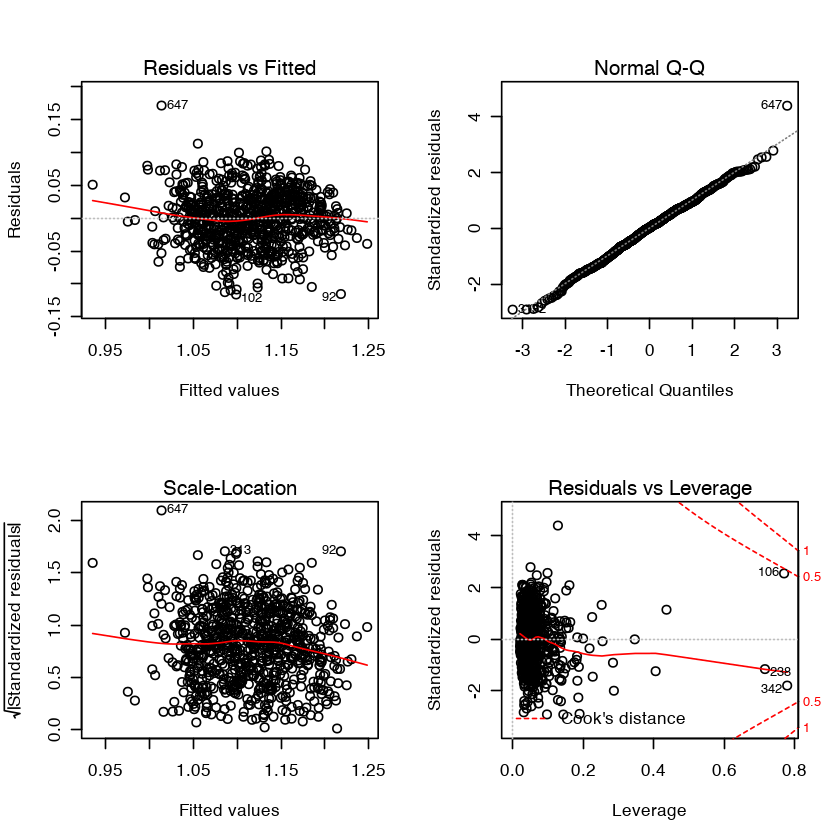

In [38]:
par(mfrow=c(2, 2))
plot(mod.r)

In [39]:
length(data$beetleAcres)

[1] 828

In [41]:
par(mfrow=c(1, 2))
hist(y.tuk)
hist(log(y))

In [42]:
bstar = NULL # Rows of bstar will be bootstrap vectors of regression coefficients.
n = dim(data)[1] 
B = 1000
ptm <- proc.time()
for(draw in 1:B){
  # Randomly sample from the rows, with replacement
  Dstar = data[sample(1:n,size=n,replace=T),]
  model <- lm(
    beetleAcres^0.025 ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + PctLarge + PctOld + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) 
    + logSprsCPA.p1 + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays,
    data=Dstar)
  bstar = rbind( bstar,coef(model) )
  # print(draw)
} # Next draw
proc.time() - ptm

   user  system elapsed 
 29.087   0.671  35.286 

In [43]:
bstar <- as.data.frame(bstar)

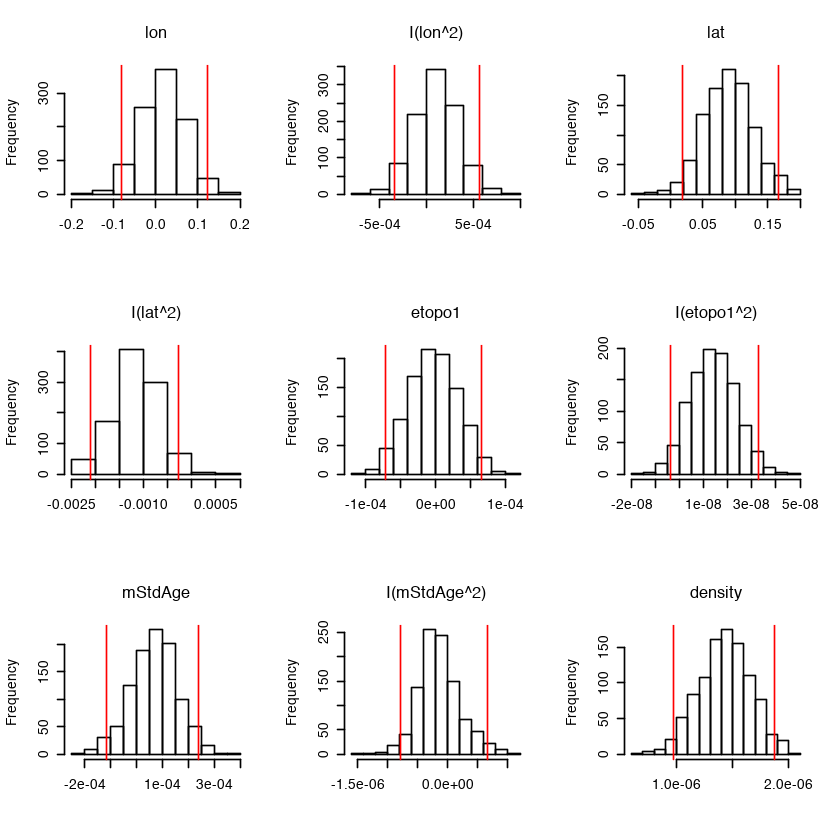

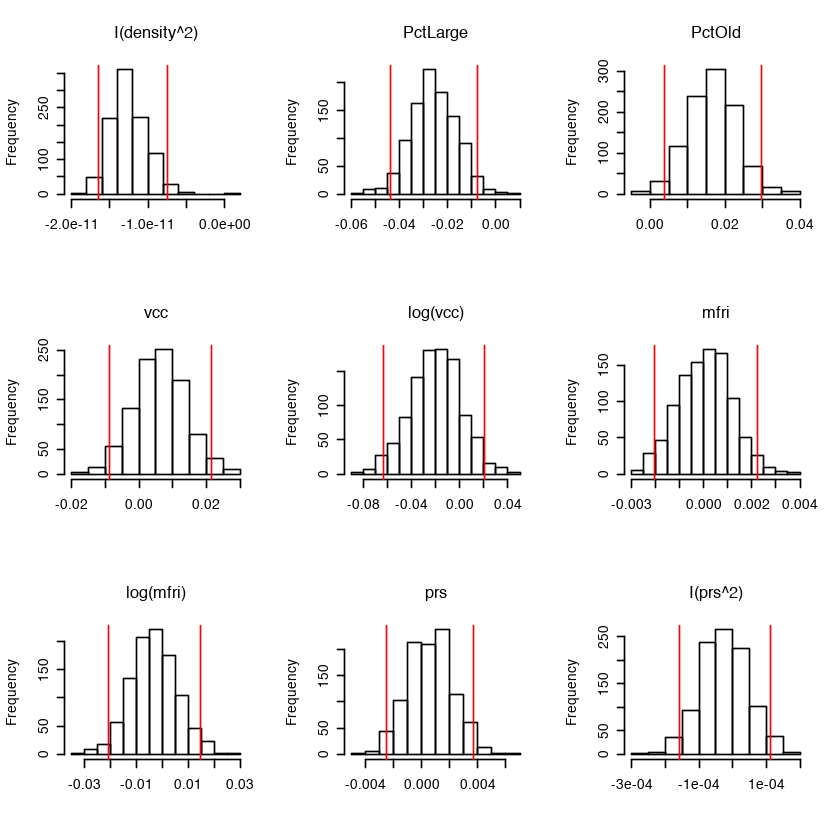

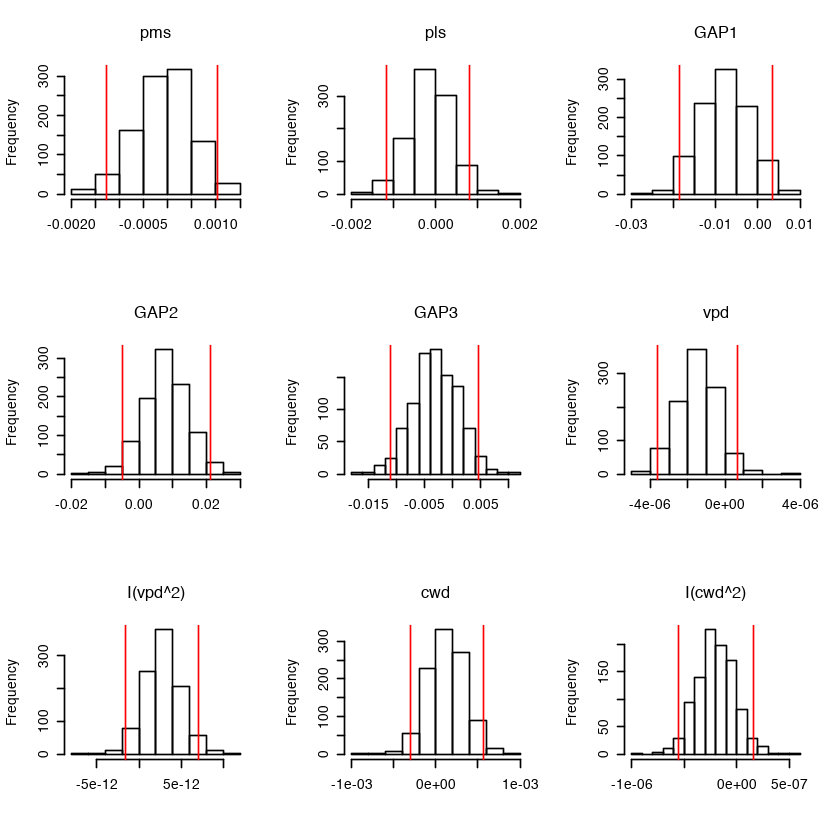

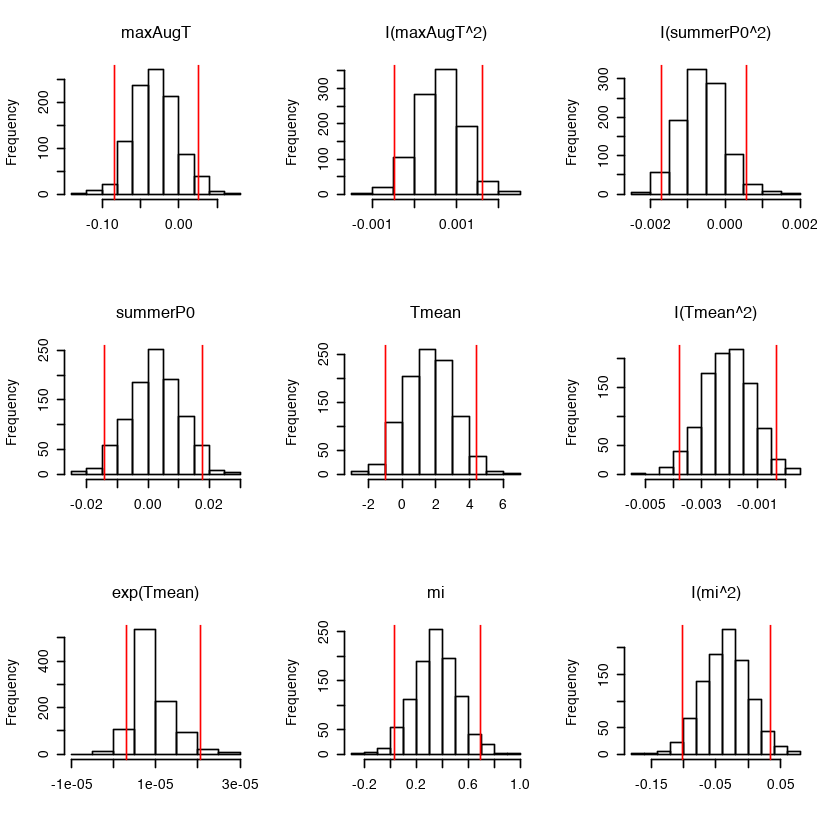

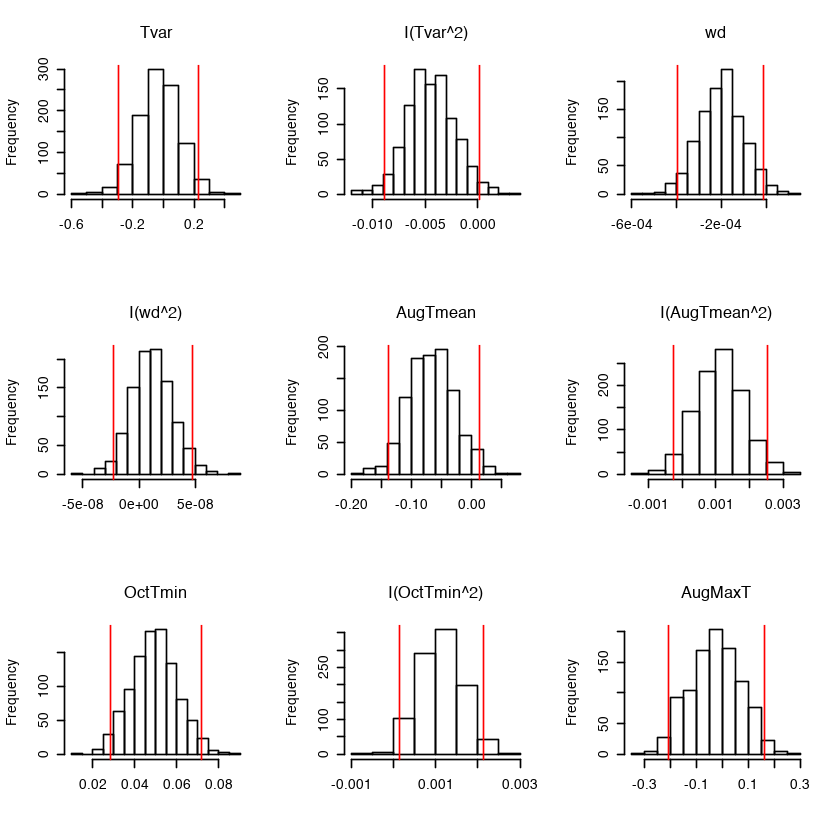

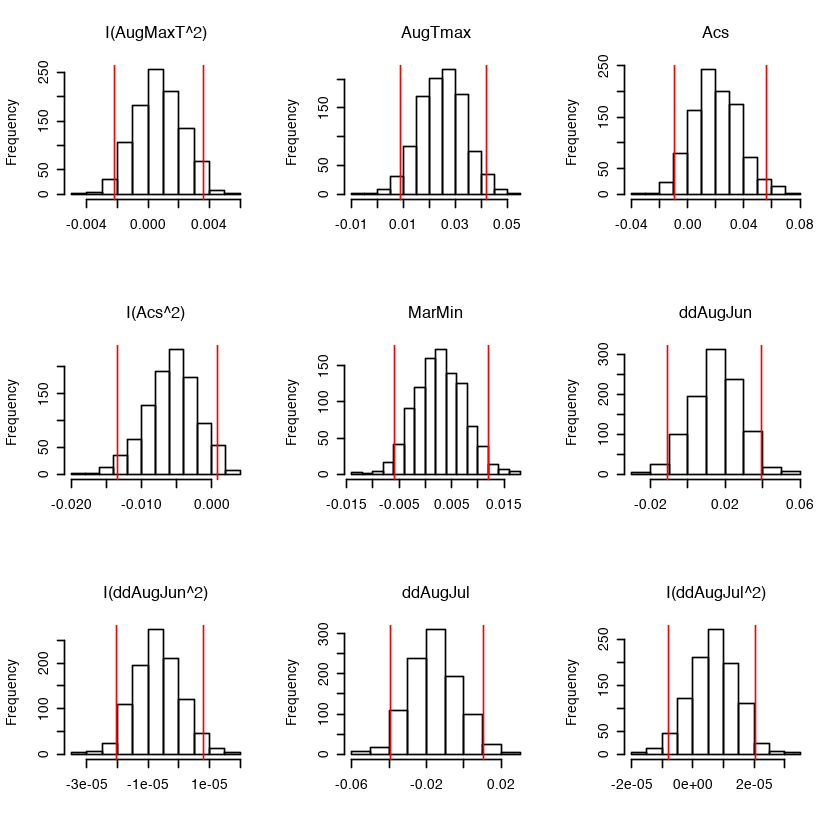

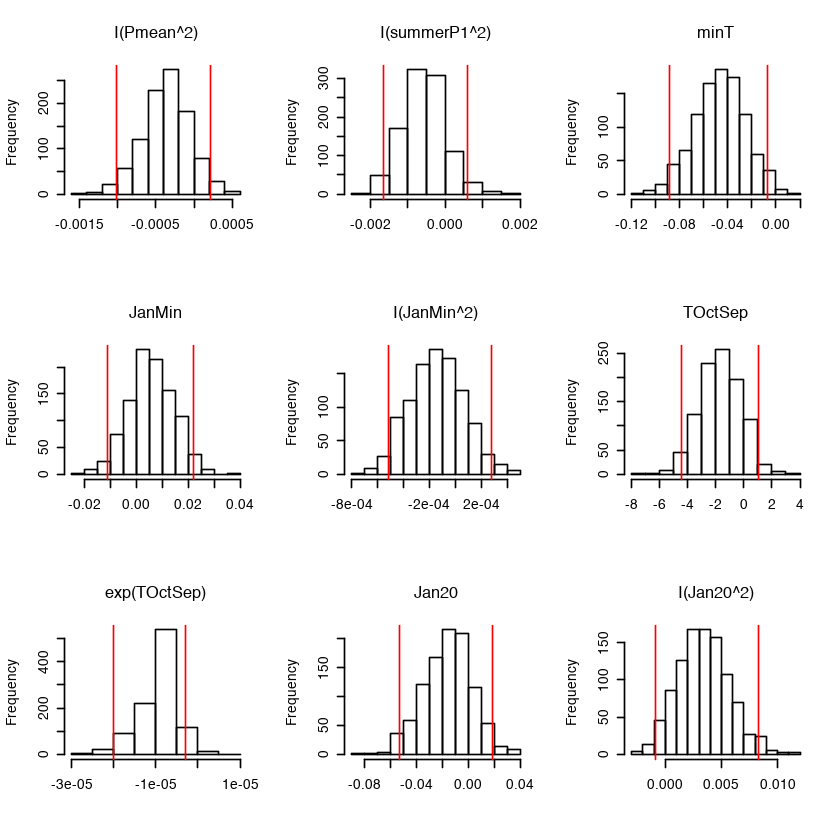

In [44]:
par(mfrow=c(3, 3))
for (field in names(bstar)) {
    if(!(field %in% c('(Intercept)', 'summerP1'))){
        hist(bstar[,field], main=field, xlab='')
        qs <- quantile(bstar[,field], prob=c(0.025, 0.975))
        abline(v=qs[1],col="red")
        abline(v=qs[2],col="red")
    }
}

In [128]:
colnames(bstar)

[1] "(Intercept)"     "lon"             "I(lon^2)"        "lat"            
 [5] "I(lat^2)"        "etopo1"          "I(etopo1^2)"     "mStdAge"        
 [9] "I(mStdAge^2)"    "density"         "I(density^2)"    "PctLarge"       
[13] "PctOld"          "vcc"             "log(vcc)"        "mfri"           
[17] "log(mfri)"       "prs"             "I(prs^2)"        "pms"            
[21] "pls"             "GAP1"            "GAP2"            "GAP3"           
[25] "vpd"             "I(vpd^2)"        "cwd"             "I(cwd^2)"       
[29] "maxAugT"         "I(maxAugT^2)"    "I(summerP0^2)"   "summerP0"       
[33] "Tmean"           "I(Tmean^2)"      "exp(Tmean)"      "mi"             
[37] "I(mi^2)"         "Tvar"            "I(Tvar^2)"       "wd"             
[41] "I(wd^2)"         "AugTmean"        "I(AugTmean^2)"   "OctTmin"        
[45] "I(OctTmin^2)"    "AugMaxT"         "I(AugMaxT^2)"    "AugTmax"        
[49] "Acs"             "I(Acs^2)"        "MarMin"          "ddAugJun"       
[53] "I(ddAugJun^2)"   "ddAugJul"        "I(ddAugJul^2)"   "JanTmin"        
[57] "PPT"             "I(PPT^2)"        "summerP2"        "I(summerP2^2)"  
[61] "TMarAug"         "exp(TMarAug)"    "Mar20"           "log(Mar20 + 1)" 
[65] "fallTmean"       "exp(fallTmean)"  "MarTmin"         "maxT"           
[69] "I(maxT^2)"       "Tmin"            "winterMin"       "summerTmean"    
[73] "Pmean"           "I(Pmean^2)"      "summerP1"        "I(summerP1^2)"  
[77] "minT"            "JanMin"          "I(JanMin^2)"     "TOctSep"        
[81] "exp(TOctSep)"    "Jan20"           "I(Jan20^2)"      "PcumOctSep"     
[85] "I(PcumOctSep^2)" "logSprsCPA.p1"   "SprsFires"       "PctSprs"        
[89] "SprsAcre"        "SprsDays"        "OutDays"

Remove these variables:
'lon' I(lon^2) 'etopo1' 'mStdAge' 'I(mStdAge^2)' 'vcc' 'log(vcc)' 'mfri' 'log(mfri)' 'prs' 'pms' 'pls' 
'GAP1' 'GAP2' 'GAP3' 'vpd' 'I(vpd^2)' 'cwd' 'I(cwd^2)' 'maxAugT' 'I(maxAugT^2)' 'I(summerP0^2)' 
'summerP0' 'Tmean' 'I(Tmean^2)' 'I(mi^2)' 'Tvar' 'I(Tvar^2)' 'wd' 'I(wd^2)' 
'AugTmean' 'I(AugTmean^2)' 'AugMaxT' 'I(AugMaxT^2)' 'Acs' 
'I(Acs^2)' 'MarMin' 'ddAugJun' 'I(ddAugJun^2)' 'ddAugJul' 'I(ddAugJul^2)' 'JanTmin' 'PPT' 'I(PPT^2)' 
'summerP2' 'I(summerP2^2)' 'TMarAug' 'Mar20' 'log(Mar20 + 1)' 'fallTmean'
'MarTmin' 'maxT' 'I(maxT^2)' 'Tmin' 'winterMin' 'summerTmean' 'Pmean' 'I(Pmean^2)' 'summerP1' 'I(summerP1^2)' 
'JanMin' 'I(JanMin^2)' 'TOctSep' 'Jan20' 'I(Jan20^2)' 'PcumOctSep' 'I(PcumOctSep^2)' 
'logSprsCPA.p1' 'SprsDays' 'OutDays' 

mod <- lm(
    beetleAcres^0.025 ~ lat + I(lat^2) + I(etopo1^2) + exp(fallTmean) + mi
    + density + I(density^2) + PctLarge + PctOld + I(prs^2) + GAP1 + exp(Tmean) + OctTmin + AugTmax 
    + exp(TMarAug) + minT + exp(TOctSep) + SprsFires + PctSprs + SprsAcre,
    data=data)

In [45]:
mod <- lm(
    beetleAcres^0.025 ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + PctLarge + PctOld + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2) 
    + logSprsCPA.p1 + SprsFires + PctSprs + SprsAcre + SprsDays + OutDays,
    data=data)

In [46]:
mod.r <- step(mod, trace=0)
summary(mod.r)


Call:
lm(formula = beetleAcres^0.025 ~ lat + I(lat^2) + I(etopo1^2) + 
    density + I(density^2) + PctLarge + PctOld + GAP2 + I(cwd^2) + 
    I(summerP0^2) + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + 
    I(Tvar^2) + wd + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + 
    I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + ddAugJul + I(ddAugJul^2) + 
    I(PPT^2) + summerP2 + I(summerP2^2) + exp(TMarAug) + Mar20 + 
    log(Mar20 + 1) + fallTmean + exp(fallTmean) + maxT + I(maxT^2) + 
    Tmin + winterMin + summerTmean + I(Pmean^2) + I(summerP1^2) + 
    minT + JanMin + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + 
    SprsFires + PctSprs + SprsAcre, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.11830 -0.02794  0.00220  0.02827  0.18332 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -1.060e+00  4.804e-01  -2.207 0.027583 *  
lat             6.198e-02  2.071e-02   2.993 0.002848 ** 
I(lat^2)       -7.734e-04  

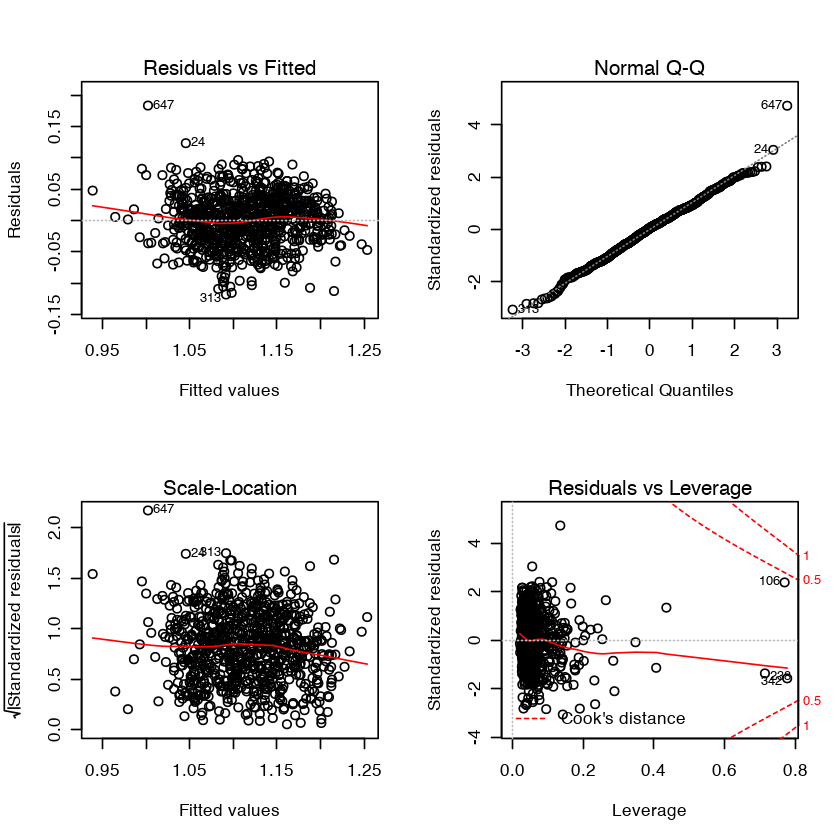

In [47]:
par(mfrow=c(2, 2))
plot(mod.r)

In [48]:
sort(abs(mod.r$coefficients))

I(density^2)   exp(TMarAug)    I(etopo1^2)       I(PPT^2) exp(fallTmean) 
  1.335302e-11   1.145240e-09   1.141454e-08   1.429120e-08   2.876830e-08 
 I(ddAugJul^2)       I(cwd^2)       SprsAcre        density   exp(TOctSep) 
  3.232767e-08   1.249486e-07   1.198735e-06   1.482876e-06   6.839588e-06 
    exp(Tmean)     PcumOctSep     I(Pmean^2)             wd       ddAugJul 
  6.994081e-06   5.705513e-05   6.447293e-05   1.154304e-04   1.360808e-04 
  I(AugMaxT^2)       summerP2  I(summerP2^2)      SprsFires       I(lat^2) 
  2.895258e-04   4.217089e-04   4.563476e-04   7.470488e-04   7.734073e-04 
 I(summerP1^2)  I(summerP0^2)      I(maxT^2)   I(OctTmin^2)  I(AugTmean^2) 
  8.965958e-04   9.252140e-04   1.223058e-03   1.223705e-03   1.314252e-03 
    I(Tmean^2)      I(Tvar^2)     I(Jan20^2)       I(Acs^2)           GAP2 
  2.299355e-03   3.907199e-03   4.376582e-03   5.882270e-03   1.128437e-02 
       I(mi^2)         JanMin         PctOld            Acs       PctLarge 
  1.145761e-02   1.245284e-02   1.662309e-02   2.316696e-02   2.374406e-02 
         Jan20        PctSprs        AugTmax           Tmin      winterMin 
  2.495268e-02   2.559246e-02   2.675020e-02   2.779916e-02   3.050065e-02 
          minT    summerTmean        OctTmin          Mar20            lat 
  3.937408e-02   4.802462e-02   5.054684e-02   6.073442e-02   6.198016e-02 
          maxT          Tmean       AugTmean      fallTmean log(Mar20 + 1) 
  6.653464e-02   7.343669e-02   8.909684e-02   1.023144e-01   1.243582e-01 
            mi    (Intercept) 
  2.031803e-01   1.060476e+00